<center><h1>Is America’s Glass Half-Empty? Discovering drivers of America’s prospective thinking.</center>


#### Authors: <a href="https://github.com/Alexia-Garces">Alexia Garces</a>, <a href="https://github.com/Brooke-Holyoak">Brooke Holyoak</a>, <a href="https://github.com/CharlesAtchison">Charles Atchison</a>, <a href="https://github.com/Jason-Tellez">Jason Tellez</a>, <a href="https://github.com/malachi-hale">Malachi Hale</a>

<a name ='toc'></a>
# Table of Contents 
1. [Project Planning](#project_planning)
    1. [Project Objectives](#project_objectives)
    2. [Business Goals](#business_goals)
    3. [Audience](#audience)
    4. [Deliverables](#deliverables)
2. [Executive Summary](#exe_sum)
    1. [Goals](#goals)
    2. [Findings](#findings)
3. [Import Required Modules](#imports)
3. [Acquire Data](#acquire)
    1. [Working with American Trends Panel Data](#working_with_data)
    2. [Data Dictonary](#data_dict) 
    3. [Acquire Takeaways](#acquire_takeaways)
4. [Prepare Data](#prepare)
    1. [Data Attributes](#data_attributes)
    2. [Prepare Takeaways](#prepare_takeaways)
5. [Data Exploration](#explore)
    1. [Hypothesis & Testing](#hypotheses)
    2. [Explore by Gender](#gender)
    3. [Explore by Political Party](#political)
    4. [Explore by Income Level](#income)
    5. [Explore by Education Level](#education)
    6. [Clustering](#clustering)
    7. [Explore Takeaways](#explore_takeaways)
6. [Modeling & Evaluation](#modeling)
    1. [Baseline](#baseline)
    2. [Decision Tree](#decision_tree)
    3. [Random Forest](#random_forest)
    4. [K Nearest Neighbors](#knn)
    5. [Other Models](#other_models)
    6. [Feature Importance](#feature_importance)
    7. [Modeling with just the top features](#top)
    9. [Model Comparison](#model_comparison)
    10. [Out of Sample Testing](#out_of_sample)
    11. [Modeling the Gender Subsets](#gender_modeling)
    12. [Modeling the Political Party Subsets](#political_modeling)
    13. [Modeling the Income Level Subsets](#income_modeling)
    14. [Modeling the Education Level Subsets](#education_modeling) 
    15. [Modeling Takeaways](#modeling_takeaways)
7. [Project Delivery](#delivery)
    1. [Conclusion & Next Steps](#conclusion_and_next_steps)
    2. [Project Replication](#replicate)
    3. [Data Use Agreements](#data_use)

<hr style="border-top: 10px groove tan; margin-top: 5px; margin-bottom: 5px"></hr>

<a name='project_planning'></a>
# Project Planning
✓ 🟢 **Plan** ➜ ☐ _Acquire_ ➜ ☐ _Prepare_ ➜ ☐ _Explore_ ➜ ☐ _Model_ ➜ ☐ _Deliver_

<a name='project_objectives'></a>
## Project Objectives 
> - Utilize American Trends Panel Datasets (downloadable <a href="https://www.kaggle.com/shankanater/american-trends-panel-pewresearch/download">here</a>), with statistical modeling techniques to assess and attempt to predict sentiment toward particular topics.
> - This will culminate in a well-built well-documented jupyter notebook that contains our process and derivation of these predictions.
> - Modules will be created that abstract minute aspects of the data pipeline process.

<a name='business_goals'></a>
## Business Goals 
> - Utilize tabulated statistical data aquired from Pew Research American Trends Surveys.
> - Prepare, explore and formulate hypotheses about the data.
> - Build models that can predict future American sentiment toward certain topics, and utilize hyperparameter optimization and feature engineering to improve validation model performance prior to evaluating on test data.
> - Document all these steps throughly.

<a name='audience'></a>
## Audience 
> - General population and individuals without specific knowledge or understanding of the topic or subject.

<a name='deliverables'></a>
## Deliverables
> - A clearly named final notebook. This notebook will contain more detailed processes other than noted within the README and have abstracted scripts to assist on readability.
> - A `README.md` that explains what the project is, how to reproduce the project, and notes about the project.
> - A Python module and associated modules that automate the data acquisition and preparation process. 

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>


<a name='exe_sum'></a>
# Executive Summary
> - Our team acquired Pew Research Panel survey data and utilized this data to explore the drivers of pessimism in American Prospective Attitudes.
> - Being able to understand what most likely drives pessimistic or optimistic thinking about the future will help business leaders clarify strategies for moving foward.
> - This project will also help guide expectations of future success in the customers these business leaders serve, in addition to the products offered, investment, marketing and sales, and other aspects throughout their organization. 

<a name='goals'></a>
## Goals
> - Build a model that can predict future American sentiment toward certain topics, utilizing split survey data as the training dataset.

<a name='findings'></a>
## Findings
> - Standard demographic features like age, sex, and income are not drivers of overall pessimism. However, features like what will happen to the average family's standard of living, cost of healthcare, and the future of the public education system are highly correlated with overall pessimism.

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>


<a name='imports'></a>
# Import Required Modules

In [1]:
import pandas as pd
import numpy as np
# supress scientific notation
np.set_printoptions(suppress=True)
from scipy import stats

#set seaborn color pallete
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('plasma')
pal = sns.set_palette('plasma')

# This module displays Markdown and helps with visability within Juypter Notebooks
from IPython.display import Markdown, display, HTML

# Import Clustering
from sklearn.cluster import KMeans

# Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import Metrics
from sklearn.metrics import (
    classification_report, confusion_matrix,
    recall_score, plot_confusion_matrix)

#Disable Warnings 
import warnings
warnings.filterwarnings('ignore')

#Import functions
import acquire as a
import prepare as p
import explore as e
import model as m

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='acquire'></a>
# Acquire Data
✓ _Plan_ ➜ 🟢 **Acquire** ➜ ☐ _Prepare_ ➜ ☐ _Explore_ ➜ ☐ _Model_ ➜ ☐ _Deliver_

> - Check if the "ATP W41.sav" Statistical SPSS file is within the current directory.
> - If the data is not present within the current directory, you can download it from <a href="https://www.kaggle.com/shankanater/american-trends-panel-pewresearch/download">here</a> 
> - If the data is present, read the data into a Pandas DataFrame and return the data as `atp_df`.


<a name="working_with_data"></a>
## Working with American Trends Panel Data 

### Demographic Profile Variables
> Each ATP dataset comes with a number of variables prefixed by “F_” (for “frame”) that contain demographic profile data. These variables are not measured every wave; instead, they are sourced from panel profile surveys conducted on a less frequent basis. Some profile variables are also occasionally asked on panel waves and are accordingly updated for each panelist. Profile information is based on panelists’ most recent response to the profile questions. Some variables are coarsened to help protect the confidentiality of our panelists. Interviewer instructions in `[ ]` and voluntary responses in `( )` are included if the source of a profile variable was ever presented in phone (CATI) mode. See Appendix I for the profile variable codebook.

###  Unique Identifier
> The variable `QKEY` is a unique identifier assigned to each respondent. `QKEY` can be used to link multiple panel waves together. Note that except in a few instances, `WEIGHT_W41` are only provided for single waves. Use caution when analyzing data from multiple waves without weights that are designed for use with multiple waves.

### Data Variable Types
 > American Trends Panel datasets contain single-punch or multi-punch variables. For questions in a 'Check all that apply' format, each option has its own variable indicating whether a respondent selected the item or not. For some datasets there is an additional variable indicating whether a respondent did not select any of the options. Open-end string variables are not included in ATP datasets. Coded responses to open-end questions are included when available.

### Dataset Format
> The dataset is formatted as a .sav file and can be read with the SPSS software program. The dataset can also be read with the R programming language, using the `foreign` package. R is a free, open-source program for statistical analysis that can be downloaded <a href="https://cran.r-project.org/">here</a>. It can also be used to export data in .csv format for use with other software programs.

> **NOTE**: Using other tools to directly convert the .sav file to another format such as .csv may ERASE value
labels. For this reason, it is highly recommended that you use either SPSS or R to read the file directly.


In [2]:
# get atp_w41_spss data
atp_df = a.get_atp_w41_spss_data()
# Inspect the truncated dataframe
atp_df.head()

,QKEY,NEW_Device_Type_W41,F_LANGUAGE,FORM_W41,OPTIMIST_W41,AVGFAM_W41,HAPPENa_W41,HAPPENb_W41,HAPPENc_W41,HAPPENd_W41,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_INTUSER,F_VOLSUM,WEIGHT_W41
0,100363.0,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,Democrat,NaN,Dem/Lean Dem,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.599006
1,101224.0,Mobile phone,English,Form 1,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,Republican,NaN,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.292981
2,101437.0,Desktop,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,Republican,NaN,Rep/Lean Rep,"$10,000 to less than $20,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,0.418871
3,102130.0,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,Independent,Refused,DK/Refused/No lean,Refused,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,Yes,0.342058
4,103094.0,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,Refused,Health care will be LESS affordable,Refused,The U.S. will be LESS important in the world,...,Something else,Refused,DK/Refused/No lean,"$20,000 to less than $30,000","<$30,000",You are NOT registered to vote at your current...,Liberal,Internet User,Yes,0.329465


In [3]:
#Look at the shape of the newly acquired DataFrame
atp_df.shape

(2524, 124)

[Go to bottom of DataFrame Dictionary](#bottom_of_data_dict)

<a name='data_dict'></a>
## DataFrame Dictionary

<table>
<th style="text-align:left">Original Column Name</th>
<th></th><th style="text-align:left">New Column Name</th><th style="text-align:center">Question</th><th style="text-align:center">Responses</th><tr>
        <td style="text-align:left"><code>FTRWORRYa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_economy</code></td>
        <td style="text-align:center">How worried are you, if at all, about the overall soundess of our economic system?</td>
        <td><ul>1 Not too worried</ul><ul>2 Fairly worried</ul><ul>3 Very worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_public_schools</code></td>
        <td style="text-align:center">How worried are you, if at all, about the ability of public schools to provide a quality education?</td>
        <td><ul>1 Fairly worried</ul><ul>2 Very worried</ul><ul>3 Not too worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYc_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_government</code></td>
        <td style="text-align:center">How worried are you, if at all, about the way the government in Washington works?</td>
        <td><ul>1 Fairly worried</ul><ul>2 Very worried</ul><ul>3 Not too worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYd_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_leaders</code></td>
        <td style="text-align:center">How worried are you, if at all, about the ability of political leaders to solve the country’s biggest problems?</td>
        <td><ul>1 Fairly worried</ul><ul>2 Very worried</ul><ul>3 Not too worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYe_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_morals</code></td>
        <td style="text-align:center">How worried are you, if at all, about the moral values of Americans?</td>
        <td><ul>1 Fairly worried</ul><ul>2 Very worried</ul><ul>3 Not too worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYf_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_climate</code></td>
        <td style="text-align:center">How worried are you, if at all, about climate change?</td>
        <td><ul>1 Not too worried</ul><ul>2 Not at all worried</ul><ul>3 Very worried</ul><ul>4 Fairly worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ELDCARE_W41eldcare</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>elder_care</code></td>
        <td style="text-align:center">How worried are you, if at all, about climate change?</td>
        <td><ul>1 LESS prepared financially for retirement than older adults today</ul><ul>2 BETTER prepared financially for retirement than older adults are today</ul><ul>Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ELDFINANCEF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>elder_finance_1</code></td>
        <td style="text-align:center">Who do you think will be mostly responsible for paying for the long-term care older Americans may need?</td>
        <td><ul>1 Family members</ul><ul>2 Older Americans themselves</ul><ul>3 Government</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ELDFINANCEF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>elder_finance_2</code></td>
        <td style="text-align:center">Who do you think should be mostly responsible for paying for the long-term care older Americans may need?</td>
        <td><ul>1 Government</ul><ul>2 Family members</ul><ul>3 Older Americans themselves</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_debt</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to the national debt?</td>
        <td><ul>1 A lower priority</ul><ul>2 A top priority</ul><ul>3 An important, but not a top priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_education</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to increasing spending for education?</td>
        <td><ul>1 An important, but not a top priority</ul><ul>2 A top priority</ul><ul>3 Should not be done</ul><ul>4 A lower priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOc_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_healthcare</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to providing high-quality, affordable health care to all Americans?</td>
        <td><ul>1 A lower priority</ul><ul>2 A top priority</ul><ul>3 An important, but not a top priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOd_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_science</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to increasing spending on scientific research?</td>
        <td><ul>1 An important, but not a top priority</ul><ul>2 A lower priority</ul><ul>3 Should not be done</ul><ul>4 A top priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOe_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_inequality</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing the gap between the rich and the poor?</td>
        <td><ul>1 A top priority</ul><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOfF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_reduce_military</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing military spending?</td>
        <td><ul>1 A lower priority</ul><ul>2 An important, but not a top priority</ul><ul>3 Should not be done</ul><ul>4 A top priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOgF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_undocumented_immigration</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing the number of undocumented immigrants coming into the US?</td>
        <td><ul>1 A top priority</ul><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOhF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_increase_social_security</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing spending on Social Security, Medicare and Medicaid?</td>
        <td><ul>1 A top priority</ul><ul>2 Should not be done</ul><ul>3 An important, but not a top priority</ul><ul>4 A lower priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOjF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_avoid_tax_increase</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to avoiding tax increases?</td>
        <td><ul>1 A top priority</ul><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOkF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_increase_military</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to increasing military spending?</td>
        <td><ul>1 An important, but not a top priority</ul><ul>2 A lower priority</ul><ul>3 A top priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOlF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_more_immigration</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to allowing more immigrants into the US who come here legally?</td>
        <td><ul>1 Should not be done</ul><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 A top priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOnF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_reducing_spending_infrastructure</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing spending for roads, bridges and other infrastructure?</td>
        <td><ul>1 Should not be done</ul><ul>2 An important, but not a top priority</ul><ul>3 A top priority</ul><ul>4 A lower priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOoF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_climate</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to dealing with climate change?</td>
        <td><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>sci_tech</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Science and Technology will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A very positive impact</ul><ul>2 A somewhat negative impact</ul><ul>3 A somewhat positive impact</ul><ul>4 A very negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>major_corps</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Major Corporations will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A somewhat negative impact</ul><ul>3 A very negative impact</ul><ul>4 A very positive impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBc_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>rel_groups</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Religious Groups will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A somewhat negative impact</ul><ul>3 A very positive impact</ul><ul>4 A very negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBdF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>gov_in_wash</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think the Government in Washington will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A very negative impact</ul><ul>3 A somewhat negative impact</ul><ul>4 A very positive impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBeF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>state_local</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think State and Local Government will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat negative impact</ul><ul>2 A very positive impact</ul><ul>3 A very negative impact</ul><ul>4 A somewhat positive impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBf_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>media</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think the News Media will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat negative impact</ul><ul>2 A very negative impact</ul><ul>3 A somewhat positive impact</ul><ul>4 A very positive impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBg_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>military</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think the Military will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A very positive impact</ul><ul>3 A very negative impact</ul><ul>4 A somewhat negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBh_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>college_uni</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Colleges and Universities will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A very negative impact</ul><ul>3 A very positive impact</ul><ul>4 A somewhat negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBi_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>schools</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Public K-12 Schools will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A very positive impact</ul><ul>3 A somewhat negative impact</ul><ul>4 A very negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1F1a_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_false_f1</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault in the workplace today, how much of a problem, if at all, would you say is women claiming they have experienced sexual harassment or assault when it hasn’t actually occurred?</td>
        <td><ul>1 Major problem</ul><ul>2 Minor problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1F1b_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_fired_f1</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault in the workplace today, how much of a problem, if at all, would you say is employers firing men who have been accused of sexual harassment or assault before finding out all the facts?</td>
        <td><ul>1 Major problem</ul><ul>3 Minor problem</ul><ul>4 Not a problem</ul><ul>2 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1F1c_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_unpunished_f1</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault in the workplace today, how much of a problem, if at all, would you say is men getting away with committing sexual harassment or assault?</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1F1d_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_unbelieved_f1</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault in the workplace today, how much of a problem, if at all, would you say is women not being believed when they claim that they have experienced sexual harassment or assault</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1NOWRKF2a_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_false_f2</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault today, how much of a problem, if at all, would you say is women claiming they have experienced sexual harassment or assault when it hasn’t actually occurred?</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1NOWRKF2c_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_unpunished_f2</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault today, how much of a problem, if at all, would you say is men getting away with committing sexual harassment or assault?</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1NOWRKF2d_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_unbelieved_f2</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault today, how much of a problem, if at all, would you say is women not being believed when they claim that they have experienced sexual harassment or assault?</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS3F1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_interactions_f1</code></td>
        <td style="text-align:center">Do you think the increased focus on sexual harassment and assault has made it easier or harder for men to know how to interact with women in the workplace, or hasn’t it made much difference?</td>
        <td><ul>1 Has made it harder for men</ul><ul>2 Hasn't made much difference</ul><ul>3 Has made it easier for men</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS3NOWRKF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_interactions_f2</code></td>
        <td style="text-align:center">Do you think the increased focus on sexual harassment and assault has made it easier or harder for men to know how to interact with women in the workplace, or hasn’t it made much difference?</td>
        <td><ul>1 Has made it harder for men</ul><ul>2 Has made it easier for men</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS4_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_personal_exp</code></td>
        <td style="text-align:center">Have you ever personally received unwanted sexual advances or verbal or physical harassment of a sexual nature? This can be in any circumstance, whether or not work-related.</td>
        <td><ul>1 Yes</ul><ul>2 No</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS5_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_sexual_personal_exp</code></td>
        <td style="text-align:center">Have you received unwanted sexual advances or verbal or physical harassment of a sexual nature…</td>
        <td><ul>1 Both</ul><ul>2 In a professional or work setting</ul><ul>3 Outside of a professional or work setting</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GNATPROB_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worries_federal_government</code></td>
        <td style="text-align:center">Over the next 30 years, which of the following worries you more about the federal government?</td>
        <td><ul>1 That the government will be too involved in problems that should be left to businesses and individuals</ul><ul>2 That the government will do too little to solve problems facing the country</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>WRKTRN1F1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>most_responsible_for_workers_f1</code></td>
        <td style="text-align:center">Over the next 30 years, who should be MOST responsible for making sure American workers have the right skills and training to get a good job?</td>
        <td><ul>1 Employers</ul><ul>2 Individuals themselves</ul><ul>3 Government</ul><ul>4 The education system</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>WRKTRN2F1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>second_most_responsible_for_workers_f1</code></td>
        <td style="text-align:center">Who should be the SECOND-MOST responsible for making sure American workers have the right skills and training to get a good job?</td>
        <td><ul> (LIST WITH R’S ANSWER TO WRKTRN1F1 OMITTED)</ul><ul>1 The education system</ul><ul>2 Employers</ul><ul>3 Individuals themselves</ul><ul>4 Government</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>WRKTRN2F2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>second_most_responsible_for_workers_f2</code></td>
        <td style="text-align:center">Who should be the SECOND-MOST responsible for making sure young adults have the right skills and training to get a good job?</td>
        <td><ul> (LIST WITH R’S ANSWER TO WRKTRN1F1 OMITTED)</ul><ul>1 The education system</ul><ul>2 Government</ul><ul>3 Individuals themselves</ul><ul>4 Employers</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>JOBSECURITY_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>job_security</code></td>
        <td style="text-align:center">By the year 2050, will the average working person in this country have…</td>
        <td><ul>1 Less job security</ul><ul>2 About the same</ul><ul>3 More job security</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>JOBBENEFITS_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>job_benefits</code></td>
        <td style="text-align:center">Will the average working person in this country have employee benefits, such as health insurance, paid vacations and retirement plans that are…</td>
        <td><ul>1 Not as good as they are now</ul><ul>2 About the same as they are now</ul><ul>3 Better than they are now</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>AUTOWKPLC_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>automation_good_or_bad</code></td>
        <td style="text-align:center">Overall, has the automation of jobs through new technology in the workplace…</td>
        <td><ul>1 Neither helped nor hurt</ul><ul>2 Mostly hurt American workers</ul><ul>3 Mostly helped American workers</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ROBWRK_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>replacement_by_robots_likelihood</code></td>
        <td style="text-align:center">Overall, how likely do you think it is that 30 years from now robots and computers will do much of the work currently done by humans? Do you think this will…</td>
        <td><ul>1 Probably not happen</ul><ul>2 Probably happen</ul><ul>3 Definitely happen</ul><ul>4 Definitely not happen</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ROBWRK2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>replacement_by_robots_good_or_bad</code></td>
        <td style="text-align:center">If robots and computers do much of the work currently done by humans, do you think this would be…</td>
        <td><ul>1 A very bad thing for the country</ul><ul>2 A somewhat bad thing for the country</ul><ul>3 A somewhat good thing for the country</ul><ul>4 A very good thing for the country</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>AUTOLKLY_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>likelihood_my_job_replaced_by_robots</code></td>
        <td style="text-align:center">Within the next 30 years, how likely do you think it is that the type of work that you do will be done by robots or computers? Do you think this will…</td>
        <td><ul>1 Definitely not happen</ul><ul>2 Probably happen</ul><ul>3 Probably not happen</ul><ul>4 Definitely happen</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ROBIMPACTa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>robot_replacement_increase_inequality</code></td>
        <td style="text-align:center">If robots and computers perform most of the jobs currently being done by humans, do you think it is likely or not that inequality between the rich and the poor would increase?</td>
        <td><ul>1 Yes, likely</ul><ul>2 No, not likely</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ROBIMPACTb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>robot_replacement_means_better_jobs_for_humans</code></td>
        <td style="text-align:center">If robots and computers perform most of the jobs currently being done by humans, do you think it is likely or not that the economy would create many new, better-paying jobs for humans?</td>
        <td><ul>1 Yes, likely</ul><ul>2 No, not likely</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>LEGALIMG_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>legal_immigration_levels</code></td>
        <td style="text-align:center">In order to maintain the strength of the U.S. economy over the next 30 years, do you think that LEGAL immigration will need to be…</td>
        <td><ul>1 Maintained at current levels</ul><ul>2 Decreased</ul><ul>3 Increased</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FUTRCLASSa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>share_americans_in_upper_class</code></td>
        <td style="text-align:center">Over the next 30 years, do you think the share of Americans who are in the Upper Class will increase, decrease, or stay about the same?</td>
        <td><ul>1 Increase</ul><ul>2 Decrease</ul><ul>3 Stay about the same</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FUTRCLASSb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>share_americans_in_middle_class</code></td>
        <td style="text-align:center">Over the next 30 years, do you think the share of Americans who are in the Middle Class will increase, decrease, or stay about the same?</td>
        <td><ul>1 Increase</ul><ul>2 Decrease</ul><ul>3 Stay about the same</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FUTRCLASSc_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>share_americans_in_lower_class</code></td>
        <td style="text-align:center">Over the next 30 years, do you think the share of Americans who are in the Lower Class will increase, decrease, or stay about the same?</td>
        <td><ul>1 Increase</ul><ul>2 Decrease</ul><ul>3 Stay about the same</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_EDUCCAT</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>highest_education_three_categories</code></td>
        <td style="text-align:center">Three-way category coded from self-reported educational attainment.</td>
        <td><ul>1 College graduate+ (EDUC_ACS =11,12,13,14)</ul><ul>2 H.S. graduate or less (EDUC_ACS =1,2,3,4,5,6,7)</ul><ul>3 Some College (EDUC_ACS =8,9,10)</ul><ul>4 Don't know/Refused (EDUC_ACS =Refused)</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_EDUCCAT2</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>highest_education_six_categories</code></td>
        <td style="text-align:center">Six-way category coded from self-reported educational attainment.</td>
        <td><ul>1 Less than high school (EDUC_ACS=1,2,3,4,5)</ul><ul>2 High school graduate (EDUC_ACS =6,7)</ul><ul>3 Some college, no degree (EDUC_ACS=8,9)</ul><ul>4 Associate's degree (EDUC_ACS=10)</ul><ul>5 College graduate/some post grad (EDUC_ACS =11)</ul><ul>6 Postgraduate (EDUC_ACS =12,13,14)</ul><ul>7 Don't know/Refused (EDUC_ACS =Refused)</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_HISP</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>hispanic_or_latino</code></td>
        <td style="text-align:center">Are you of Hispanic, Latino, or Spanish origin, such as Mexican, Puerto Rican or Cuban?</td>
        <td><ul>1 No</ul><ul>2 Yes</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_RACECMB</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>race</code></td>
        <td style="text-align:center">Combining race.</td>
        <td><ul>1 White</ul><ul>2 Mixed Race</ul><ul>3 Or some other race</ul><ul>4 Black or African American</ul><ul>5 Asian or Asian-American</ul><ul>6 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_RACETHN</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>race_and_ethnicity</code></td>
        <td style="text-align:center">Race-ethnicity.</td>
        <td><ul>1 White non-Hispanic</ul><ul>2 Other</ul><ul>3 Hispanic</ul><ul>4 Black non-Hispanic</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_NATIVITY</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>birthplace</code></td>
        <td style="text-align:center">Were you born in the United States, on the island of Puerto Rico, or in another country?</td>
        <td><ul>1 U.S.</ul><ul>2 Another country</ul><ul>3 Puerto Rico</ul><ul>4 Other U.S. territory</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_CITIZEN</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>us_citizen</code></td>
        <td style="text-align:center">Are you a citizen of the United States?</td>
        <td><ul>1 Yes</ul><ul>2 No</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_MARITAL</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>marital_status</code></td>
        <td style="text-align:center">Marital status.</td>
        <td><ul>1 Married</ul><ul>2 Divorced</ul><ul>3 Never been married</ul><ul>4 Widowed</ul><ul>5 Living with a partner</ul><ul>6 Separated</ul><ul>7 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_RELIG</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>religion</code></td>
        <td style="text-align:center">Religion.</td>
        <td><ul>1 Roman Catholic</ul><ul>2 Protestant (for example, Baptist, Methodist, Non-denominational, Lutheran, Presbyterian, Pentecostal, Episcopalian, Refo</ul><ul>3 Nothing in particular</ul><ul>4 Atheist</ul><ul>5 Something else, Specify</ul><ul>6 Jewish</ul><ul>7 Agnostic</ul><ul>8 Mormon (Church of Jesus Christ of Latter-day Saints or LDS)</ul><ul>9 Hindu</ul><ul>10 Muslim</ul><ul>11 Orthodox (such as Greek, Russian, or some other Orthodox church)</ul><ul>12 Buddhist</ul><ul>13 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_BORN</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>evangelical_christian</code></td>
        <td style="text-align:center">Born-again or evangelical Christian.</td>
        <td><ul>1 No, not born-again or evangelical Christian</ul><ul>2 Yes, born-again or evangelical Christian</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_ATTEND</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>church_attendance</code></td>
        <td style="text-align:center">Aside from weddings and funerals, how often do you attend religious services?</td>
        <td><ul>1 A few times a year</ul><ul>2 More than once a week</ul><ul>3 Once a week</ul><ul>4 Seldom</ul><ul>5 Once or twice a month</ul><ul>6 Never</ul><ul>7 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_PARTY_FINAL</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>political_party_identity</code></td>
        <td style="text-align:center">In politics today, do you consider yourself a…</td>
        <td><ul>1 Democrat</ul><ul>2 Republican</ul><ul>3 Independent</ul><ul>4 Something else</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_PARTYLN_FINAL</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>political_party_lean</code></td>
        <td style="text-align:center">As of today do you lean more to…</td>
        <td><ul>1 The Republican Party</ul><ul>2 The Democratic Party</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_PARTYSUM_FINAL</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>summary_of_political_party_data</code></td>
        <td style="text-align:center">Party summary.</td>
        <td><ul>1 Dem/Lean Dem</ul><ul>2  Rep/Lean Rep</ul><ul>3 DK/Refused/No lean</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_INCOME</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>family_income_nine_categories</code></td>
        <td style="text-align:center">Family income.</td>
        <td><ul>1 Less than $10,000</ul><ul>2 $10,000 to less than $20,000</ul><ul>3 $20,000 to less than $30,000</ul><ul>4 $30,000 to less than $40,000</ul><ul>5 $40,000 to less than $50,000</ul><ul>6 $50,000 to less than $75,000</ul><ul>7 $75,000 to less than $100,000</ul><ul>8 $100,000 to less than $150,000</ul><ul>9 $150,000 or more</ul><ul>10 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_INCOME_RECODE</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>family_income_three_categories</code></td>
        <td style="text-align:center">Three-way category coded from self-reported family income.</td>
        <td><ul>1 <$30,000</ul><ul>2 $30-$74,999</ul><ul>3 $75,000+</ul><ul>4 Don't know/Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_REG</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>registered_to_vote</code></td>
        <td style="text-align:center">Which of these statements best describes you?</td>
        <td><ul>1 You are ABSOLUTELY CERTAIN that you are registered to vote at your current address</ul><ul>2 You are NOT registered to vote at your current address</ul><ul>3 You are PROBABLY registered, but there is a chance your registration has lapsed</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_IDEO</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>political_views</code></td>
        <td style="text-align:center"></td>
        <td><ul>1 Liberal</ul><ul>2 Conservative</ul><ul>3 Moderate</ul><ul>4 Very conservative</ul><ul>5 Very liberal</ul><ul>6 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_INTUSER</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>internet_access</code></td>
        <td style="text-align:center">Do you personally have access to the internet at your home?</td>
        <td><ul>1 Internet User</ul><ul>2 Non Internet User</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_VOLSUM</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>volunteer</code></td>
        <td style="text-align:center">Do you personally have access to the internet at your home?</td>
        <td><ul>1 Yes</ul><ul>2 No</ul><ul>3 Refused</ul></td>
    </tr></table>

<a name='bottom_of_data_dict'></a>

<a name='acquire_takeaways'></a>
## Takeaways from Acquire:
> - We acquired a DataFrame from a Pew Research Panel survey which contained 2524 observations and 124 columns.
>
>
> - Each row represents an individual American adult and his or her responses to the survey questions.
>
>
> - Of our 124 columns, 2 are continuous and numeric: `qkey` and `weight`. The remaining 122 columns are categorical features. 
>    - The `weight` column indicates the corresponding survey weight of each respondent in the sample. The survey weight indicates how representative an observation is of the total population.
>
>
> - The survey results provide us with information regarding each respondent's views about the future of the United States. In addition, the acquired dataset contains demographic data for each respondent, including gender, race, income level, and political affiliation.
<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='prepare'></a>
# Prepare Data
✓ _Plan_ ➜ ✓ _Acquire_ ➜ 🟢 **Prepare** ➜ ☐ _Explore_ ➜ ☐ _Model_ ➜ ☐ _Deliver_

> We will import our `prepare.py` file, which performs a series of steps to clean and prepare our data: 
>
> - **First**, we convert the categorical features in the DataFrame to objects.     
>
> - **Second**, because our target variable will be the respondents' prospective thinking, we drop rows for which the respondent refused to answer the question about prospective thinking in the column `OPTIMISMT_W41`.  
>
> - **Third**, we rename the columns as indicated by our data dictionary above.     
>
> - **Fourth**, from the column `OPTIMIST_W41`, we create new columns `is_pes`, `pes_val`, `is_very_pes`, and `is_very_opt`.  
    - The column `is_pes` introduces a Boolean value where 1 indicates a pessimistic outlook and is 0 indicates an optimistic outlook. 
    - The column `pes_val` ranks a respondent's pessisism, with 0 being the least pessismistic and 3 being the most pessimistic. 
    - The column `is_very_pes` introduces a Boolean value where 1 indicates a very pessimistic outlook and 0 indicates a somewhat pessimistic, somewhat optimistic, or very optimistic outlook. 
    - The column `is_very_opt` introduces a Boolean value where 1 indicates a very optimistic outlook and 0 indicates a somewhat optimistic, somewhat pessimistic, or very pessimistic outlook. 
>
> - **Fifth**, we create a `replace_key` which transforms every response in the categorical columns to a corresponding numeric value. We also introduce a `revert_key` which reverts the numeric values back to the original string responses.   
>
> - **Finally**, we convert the column indicating the unique identity of each respondent `QKEY` to an integer. 
>
>
> Additionally, we split the data into `train`, `validate`, and `test` datasets, stratifying on the target feature `is_pes`.

<a name='data_attributes'></a>
## Data Attributes

In [4]:
df, revert_key, replace_key = p.wrangle_data()
df.head()

,qkey,device_type,language,form,attitude,avg_family,happen_general,happen_health,happen_race,happen_usa,...,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
0,100363,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.599006,0,1,0,0
1,101224,Mobile phone,English,Form 1,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.292981,0,1,0,0
2,101437,Desktop,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,"<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,0.418871,1,2,0,0
3,102130,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,Yes,0.342058,0,1,0,0
4,103094,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,Refused,Health care will be LESS affordable,Refused,The U.S. will be LESS important in the world,...,"<$30,000",You are NOT registered to vote at your current...,Liberal,Internet User,Yes,0.329465,0,1,0,0


In [5]:
df.replace(replace_key).head()

,qkey,device_type,language,form,attitude,avg_family,happen_general,happen_health,happen_race,happen_usa,...,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
0,100363,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.599006,0,1,0,0
1,101224,0,0,0,0,1,0,1,0,0,...,1,0,1,0,1,0.292981,0,1,0,0
2,101437,1,0,0,1,0,1,1,1,1,...,2,0,1,0,0,0.418871,1,2,0,0
3,102130,0,0,0,0,2,1,1,0,1,...,3,0,2,1,1,0.342058,0,1,0,0
4,103094,0,0,0,0,2,2,1,2,1,...,2,1,0,0,1,0.329465,0,1,0,0


In [6]:
df.shape

(2515, 128)

In [7]:
train, validate, test = p.train_validate_test_split(df, 'is_pes')
train.shape, validate.shape, test.shape

((1408, 128), (604, 128), (503, 128))

<a name='prepare_takeaways'></a>
## Prepare Takeaways
> - Utilizing our `prepare.py` file, we implemented a series of functions to clean our data.
>
>
> - We eliminated nine respondents from our dataset because these respondents refused to answer the question `OPTIMIST_W41` about prospective thinking of the USA's future. 
>
>
> - Our newly created target feature `is_pes` maps the responses "Somewhat pessimistic" and "Very pessimistic" to question `OPTIMIST_W41` as the single Boolean value 1 and the responses "Somewhat optimistic" and "Very optimistic" to the single Boolean value 0. 
>
>
> - Stratifying on `is_pes`, we split our data into `train`, `validate`, and `test`, datasets of lengths 1408, 604, and 503, respectively. 
<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='explore'></a>
# Explore Data
✓ _Plan_ ➜ ✓ _Acquire_ ➜ ✓ _Prepare_ ➜ 🟢 **Explore** ➜ ☐ _Model_ ➜ ☐ _Deliver_

> - We dropped columns that were too closely related to the derivative of our target column (`is_pes`):
> - Those columns ended up being `avg_family`, `attitude`, `pes_val`, `is_very_pes` and `is_very_opt`.
> - We also dropped `qkey` since it is only an id value and will not provide any information since each is a unique value.
> - We split our train, validate, and test columns to feature dataframes and target series.


## Univariate Distributions

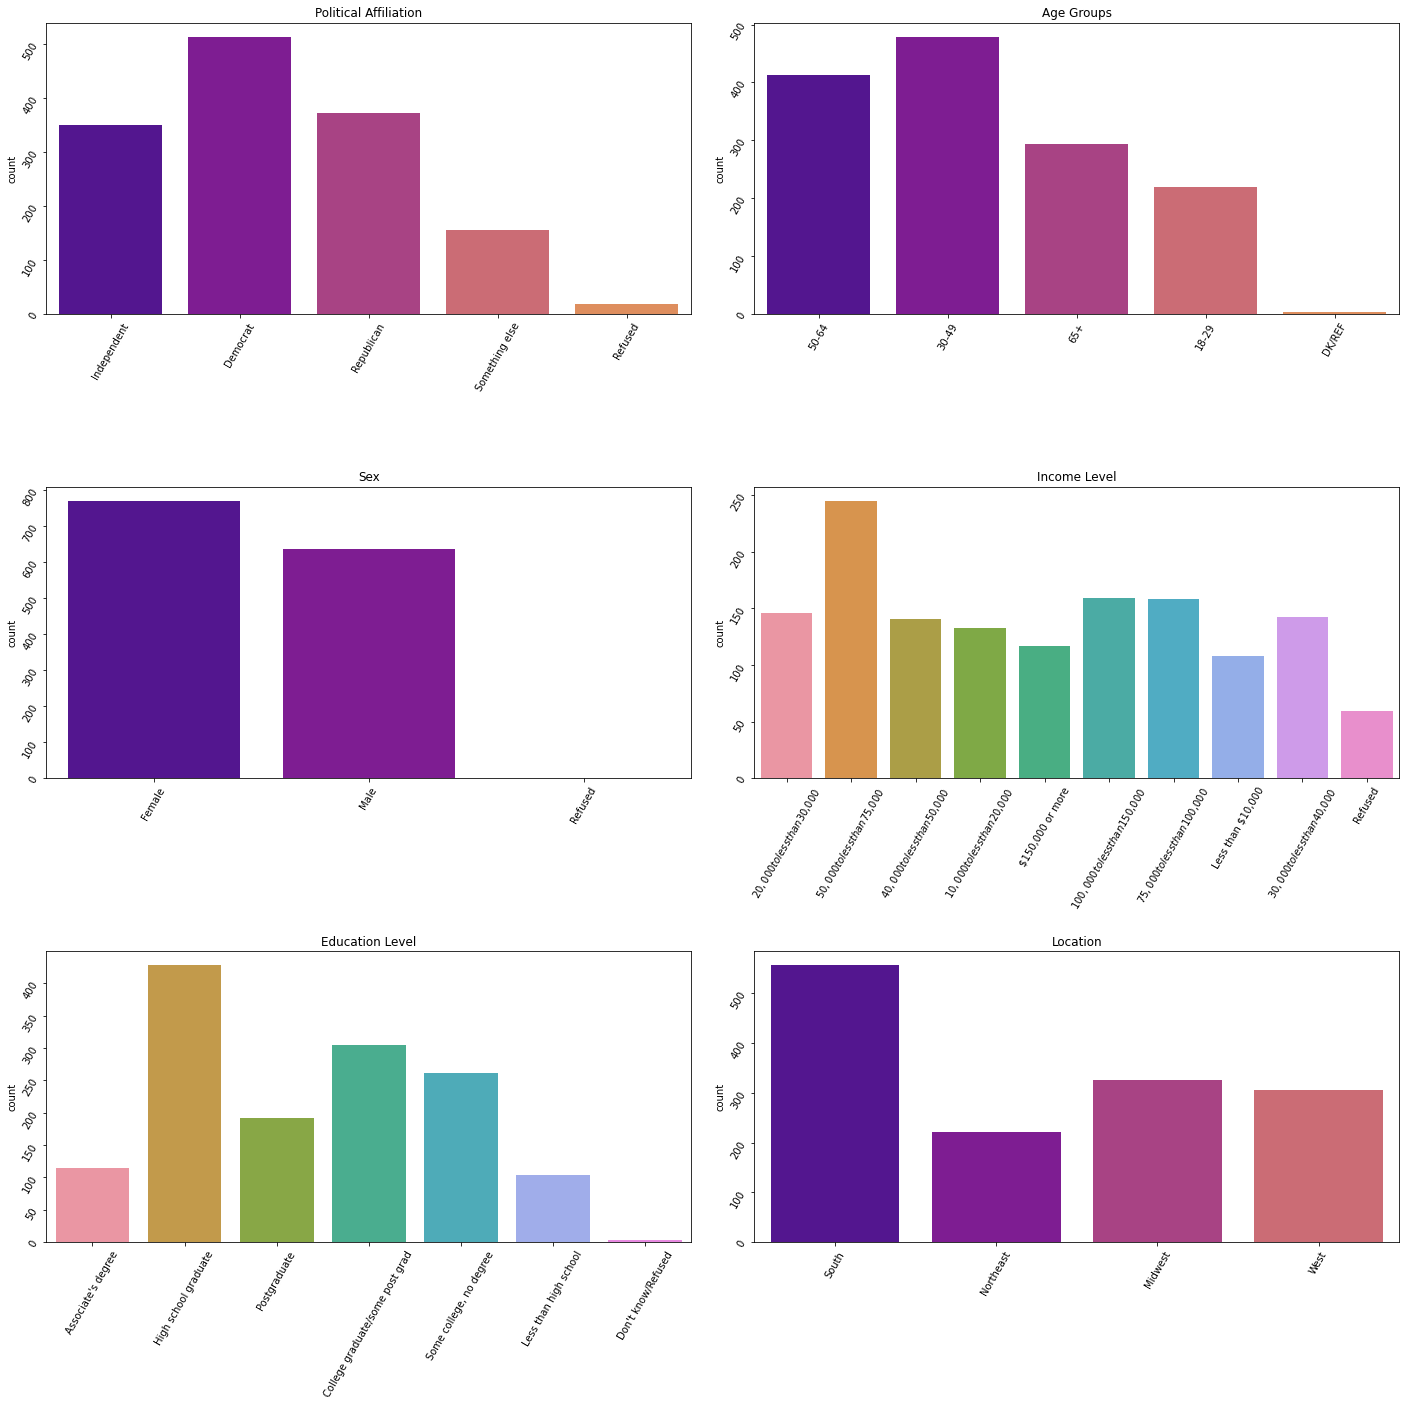

<Figure size 432x288 with 0 Axes>

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=False, sharex=False,  figsize=(20,20))

# Set suptitle
#fig.suptitle(f'Univariate')
#plt.xticks(rotation=45)

# First plot and its title
sns.countplot(data=train, x='political_party_identity', ax=axes[0,0]).set_title('Political Affiliation')
axes[0,0].tick_params(labelrotation=60)
axes[0,0].set(xlabel=None)

# Second plot and its title
sns.countplot(data=train, x='age', ax=axes[0,1]).set_title('Age Groups')
axes[0,1].tick_params(labelrotation=60)
axes[0,1].set(xlabel=None)

# Third plot and its title
sns.countplot(data=train, x='sex', ax=axes[1,0]).set_title('Sex')
axes[1,0].tick_params(labelrotation=60)
axes[1,0].set(xlabel=None)

# Fourth plot and its title
sns.countplot(data=train, x='family_income_nine_categories', ax=axes[1,1]).set_title('Income Level')
axes[1,1].tick_params(labelrotation=60)
axes[1,1].set(xlabel=None)

# Fifth plot and its title
sns.countplot(data=train, x='highest_education_six_categories', ax=axes[2,0]).set_title('Education Level')
axes[2,0].tick_params(labelrotation=60)
axes[2,0].set(xlabel=None)

# Sixth plot and its title
sns.countplot(data=train, x='census_region', ax=axes[2,1]).set_title('Location')
axes[2,1].tick_params(labelrotation=60)
axes[2,1].set(xlabel=None)

plt.rcParams.update({'font.size': 8})
plt.tight_layout(pad=3)
plt.show()
plt.savefig('images/_univariate_exploration.jpeg')

<a name='hypotheses'></a>
## Hypotheses & Testing

### Hypothesis 1
> - H<sub>0</sub>: Is sex independent of a pessimsitic future outlook?
> - H<sub>a</sub>: Sex is dependent on pessimist future outlook.
> - &#x0251;: 0.05

#### Hypothesis 1 Takeaways 
> - The number of females and males who are overall pessimistic are about the same.
> - The p-value is above 0.05, so we accept the null hypothesis.

### Hypothesis 2
> - H<sub>0</sub>: Is income independent of a pessimistic future outlook?
> - H<sub>a</sub>: Income is dependent on pessimistic future outlook.
> - &#x0251; = 0.05

#### Hypothesis 2 Takeaways 
> - While it appears that people who are middle income earners are more pessimistic, there is no significance for overall income related to overall pessimism.
> - The p-value is above 0.5, so we accept the null hypothesis.

In [9]:
# Generate object
obj = e.generate_and_return_obj(df)
# Examine the chi2 results and return the most signficant values from them
obj.chi2_df.sort_values(by='p_val').head(5)


,chi2,p_val,deg_free,expected_freq
happen_general,309.846751,5.219547e-68,2,"[[65.23082386363636, 51.76917613636363], [299...."
happen_pub_ed,236.569737,4.261223e-52,2,"[[75.26633522727273, 59.73366477272727], [411...."
happen_child_f2,180.022563,8.721545e-39,3,"[[152.7627840909091, 121.2372159090909], [210...."
happen_race,157.808874,5.398069e-35,2,"[[317.7911931818182, 252.2088068181818], [398...."
happen_health,145.049618,3.183286e-32,2,"[[447.6953125, 355.3046875], [265.941051136363..."


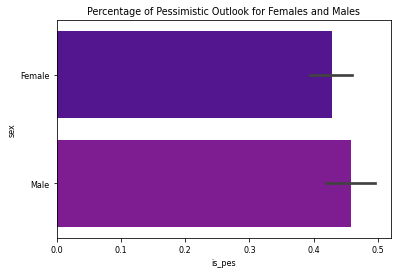

In [10]:
# print(sns.color_palette().as_hex())

#create barplot showing males vs females and their percentage of pessimism
ax = sns.barplot(y="sex", x="is_pes", data=train[train.sex != 'Refused']).set_title(
    label= "Percentage of Pessimistic Outlook for Females and Males")

# plt.savefig('images/fem_male_pessimism_percentage.png')

plt.show()

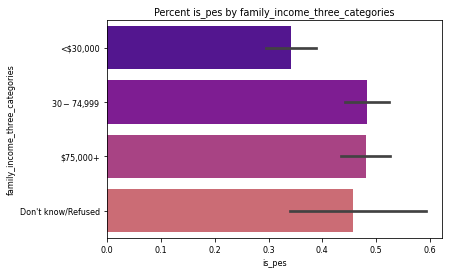

In [11]:
ax = sns.barplot(y="family_income_three_categories", x="is_pes", data=train).set_title(
label = 'Percent is_pes by family_income_three_categories')
plt.savefig('images/percent_is_pes_by_family_income.jpeg')

In [12]:
def bar_graph_percent_pessimistic(df, x_feature, y_feature):
    # Derive title
    title = f"Percent {x_feature} by {y_feature}"
    # Build filename from title
    filename = 'images/' + title.replace(' ', '_').lower() + '.jpeg'
    # Make the plot and set the title
    ax = sns.barplot(data = df, x = x_feature, y = y_feature).set_title(
    label=title)
    # Save the plot
    plt.savefig(filename)
    

### Beyond sex and income, Is education a factor in future pessimistic outlook?

In [13]:
pd.crosstab(df.highest_education_six_categories, df.is_pes, margins=True)

is_pes,0,1,All
highest_education_six_categories,,,
Associate's degree,120,81,201
College graduate/some post grad,287,229,516
Don't know/Refused,4,1,5
High school graduate,435,322,757
Less than high school,123,60,183
Postgraduate,184,179,363
"Some college, no degree",250,240,490
All,1403,1112,2515


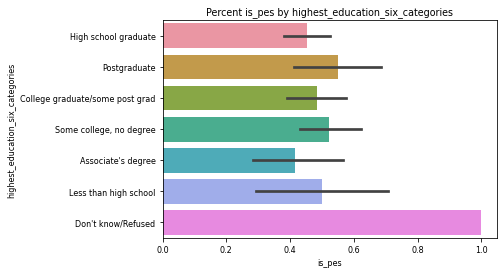

In [14]:
bar_graph_percent_pessimistic(train[train.family_income_three_categories == '$30-$74,999'], "is_pes", "highest_education_six_categories")


<a name='gender'></a>
## Explore by Gender

In [15]:
#Subset of females
females_train = train[train.sex == "Female"]
#Subset of males
males_train = train[train.sex == "Male"]

### Most Important Issues for Females

In [16]:
# Generate object
obj_f = e.generate_and_return_obj(females_train)
# Examine the chi2 results and return the most signficant values from them
issues_female = obj_f.chi2_df.sort_values(by='p_val')
issues_female.head(10)

,chi2,p_val,deg_free,expected_freq
happen_pub_ed,80.622451,3.112126e-18,2,"[[23.40139211136891, 17.59860788863109], [121...."
happen_general,76.013359,3.118234e-17,2,"[[20.54756380510441, 15.452436194895592], [95...."
happen_child_f2,63.937749,8.463552e-14,3,"[[45.66125290023202, 34.33874709976798], [64.4..."
happen_health,58.376607,2.107079e-13,2,"[[142.69141531322506, 107.30858468677494], [79..."
happen_usa,54.195569,1.704440e-12,2,"[[23.97215777262181, 18.02784222737819], [146...."
job_benefits,50.205823,7.222153e-11,3,"[[98.17169373549883, 73.82830626450117], [57.6..."
happen_race,46.330084,8.700618e-11,2,"[[99.31322505800465, 74.68677494199535], [121...."
job_security,49.649047,9.489408e-11,3,"[[88.46867749419954, 66.53132250580046], [114...."
happen_politics,41.820951,8.292697e-10,2,"[[23.40139211136891, 17.59860788863109], [54.7..."
elder_care,40.970776,1.268555e-09,2,"[[64.49651972157773, 48.50348027842227], [179...."


### Most Important Issues for Males

In [17]:
# Generate object
obj_m = e.generate_and_return_obj(males_train)
# Examine the chi2 results and return the most signficant values from them
issues_male = obj_m.chi2_df.sort_values(by='p_val')
issues_male.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,90.549991,2.174299e-20,2,"[[11.926966292134832, 10.073033707865168], [75..."
happen_race,69.385820,8.571575e-16,2,"[[76.98314606741573, 65.01685393258427], [101...."
happen_pub_ed,63.995076,1.269538e-14,2,"[[14.095505617977528, 11.904494382022472], [11..."
happen_politics,50.696915,9.801778e-12,2,"[[10.842696629213483, 9.157303370786517], [56...."
happen_health,44.075100,2.686666e-10,2,"[[110.59550561797752, 93.40449438202248], [67...."
happen_child_f2,46.036295,5.571597e-10,3,"[[39.575842696629216, 33.424157303370784], [52..."
happen_china,48.915112,6.081841e-10,4,"[[2.168539325842697, 1.8314606741573034], [24...."
happen_usa,41.034709,1.228644e-09,2,"[[11.384831460674157, 9.615168539325843], [121..."
happen_65up_f1,42.801040,2.712392e-09,3,"[[34.15449438202247, 28.84550561797753], [54.2..."
envir_50yrs,34.966945,2.552845e-08,2,"[[48.79213483146067, 41.20786516853933], [33.6..."


### Differences in Statistically Significant Issues for Men and Women

In [18]:
#Calculate issues with statistically significant correlation to pessimism for women
important_for_females = issues_female[issues_female.p_val < 0.05]
#Calculate issues with statistically significant correlation to pessimism for men
important_for_males = issues_male[issues_male.p_val < 0.05]

In [19]:
#Print list of significant issues for females
important_for_females_list = important_for_females.index.to_list()
important_for_females_list

['happen_pub_ed',
 'happen_general',
 'happen_child_f2',
 'happen_health',
 'happen_usa',
 'job_benefits',
 'happen_race',
 'job_security',
 'happen_politics',
 'elder_care',
 'fut_marriage',
 'happen_terroist',
 'worry_leaders',
 'happen_anti_semitism',
 'envir_50yrs',
 'share_americans_in_lower_class',
 'worry_economy',
 'robot_replacement_means_better_jobs_for_humans',
 'media',
 'happen_wealthgap',
 'worry_government',
 'age_impact',
 'debt_30yrs',
 'happen_rel',
 'fut_kids',
 'happen_energy',
 'worry_morals',
 'happen_65up_f1',
 'worry_public_schools',
 'share_americans_in_middle_class',
 'major_corps',
 'happen_alzheimers',
 'fut_divorce',
 'race_and_ethnicity',
 'state_local',
 'military',
 'ss_money',
 'gov_in_wash',
 'rel_groups',
 'happen_china',
 'automation_good_or_bad',
 'family_income_three_categories',
 'worry_climate',
 'college_uni',
 'ethnic_conflict',
 'ethnic_impact1',
 'race',
 'harass_sexual_personal_exp',
 'ethnic_customs',
 'harass_interactions_f2',
 'inter_mar'

In [20]:
important_for_males_list = important_for_males.index.to_list()
important_for_males_list

['happen_general',
 'happen_race',
 'happen_pub_ed',
 'happen_politics',
 'happen_health',
 'happen_child_f2',
 'happen_china',
 'happen_usa',
 'happen_65up_f1',
 'envir_50yrs',
 'job_benefits',
 'share_americans_in_lower_class',
 'share_americans_in_middle_class',
 'job_security',
 'elder_care',
 'worry_economy',
 'debt_30yrs',
 'happen_wealthgap',
 'worry_government',
 'worry_leaders',
 'happen_energy',
 'gov_in_wash',
 'happen_anti_semitism',
 'happen_terroist',
 'worry_morals',
 'schools',
 'ethnic_conflict',
 'happen_rel',
 'robot_replacement_means_better_jobs_for_humans',
 'robot_replacement_increase_inequality',
 'rel_groups',
 'happen_70yr_labor',
 'happen_alzheimers',
 'replacement_by_robots_good_or_bad',
 'race_and_ethnicity',
 'highest_education_six_categories',
 'internet_access',
 'ss_money',
 'fut_marriage',
 'worry_climate',
 'worry_public_schools',
 'legal_immigration_levels']

In [21]:
len(important_for_females), len(important_for_males)

(59, 42)

In [22]:
important_for_females_but_not_males = set(important_for_females_list).difference(set(important_for_males_list))
important_for_females_but_not_males

{'age_impact',
 'automation_good_or_bad',
 'college_uni',
 'ethnic_customs',
 'ethnic_impact1',
 'family_income_three_categories',
 'fut_divorce',
 'fut_kids',
 'harass_interactions_f2',
 'harass_sexual_personal_exp',
 'hispanic_or_latino',
 'inter_mar',
 'major_corps',
 'media',
 'military',
 'most_responsible_for_workers_f1',
 'priority_increase_military',
 'priority_infra_f1',
 'priority_science',
 'race',
 'religion',
 'share_americans_in_upper_class',
 'state_local'}

In [23]:
important_for_males_but_not_females = set(important_for_males_list).difference(set(important_for_females_list))
important_for_males_but_not_females

{'highest_education_six_categories',
 'internet_access',
 'legal_immigration_levels',
 'replacement_by_robots_good_or_bad',
 'robot_replacement_increase_inequality',
 'schools'}

Women value a wider range of issues than men. Additionally, the majority of issues that are stastically significnat for men are stastically significant for women.  

<a name='politics'></a>
## Explore by Political Party

In [24]:
#Make subset of Republicans
republicans_train = train[train.summary_of_political_party_data == ' Rep/Lean Rep']
#Make subset of Democrats
democrats_train = train[train.summary_of_political_party_data == 'Dem/Lean Dem']

### Most Important Issues for Republicans

In [25]:
# Generate object
obj_r = e.generate_and_return_obj(republicans_train)
# Examine the chi2 results and return the most signficant values from them
issues_republicans= obj_r.chi2_df.sort_values(by='p_val')
issues_republicans.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,98.438035,4.211650e-22,2,"[[10.749235474006117, 8.250764525993883], [87...."
happen_pub_ed,59.258074,1.356041e-13,2,"[[14.709480122324159, 11.290519877675841], [10..."
happen_race,54.593977,1.396589e-12,2,"[[78.63914373088684, 60.36085626911315], [93.9..."
happen_usa,50.305248,1.192214e-11,2,"[[16.972477064220183, 13.027522935779816], [95..."
happen_child_f2,44.001051,1.508407e-09,3,"[[33.379204892966364, 25.62079510703364], [46...."
happen_politics,39.589532,2.530710e-09,2,"[[13.577981651376147, 10.422018348623853], [48..."
envir_50yrs,42.662311,2.902705e-09,3,"[[80.90214067278288, 62.09785932721712], [30.5..."
happen_health,39.248722,3.000878e-09,2,"[[113.14984709480122, 86.85015290519878], [56...."
debt_30yrs,44.053863,6.252610e-09,4,"[[2.2629969418960245, 1.7370030581039755], [28..."
worry_morals,42.672744,1.209885e-08,4,"[[67.32415902140673, 51.67584097859327], [5.09..."


### Most Important Issues for Democrats

In [26]:
# Generate object
obj_d = e.generate_and_return_obj(democrats_train)
# Examine the chi2 results and return the most signficant values from them
issues_democrats = obj_d.chi2_df.sort_values(by='p_val')
issues_democrats.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,104.696409,1.842738e-23,2,"[[22.372365339578455, 18.627634660421545], [71..."
happen_pub_ed,101.157391,1.081313e-22,2,"[[20.18969555035129, 16.81030444964871], [115...."
happen_race,81.262306,2.260032e-18,2,"[[85.66978922716628, 71.33021077283372], [126...."
happen_health,57.160823,3.869769e-13,2,"[[132.59718969555036, 110.40281030444964], [79..."
worry_economy,60.499532,4.597460e-13,3,"[[117.86416861826697, 98.13583138173303], [1.6..."
worry_leaders,56.285782,3.650540e-12,3,"[[81.30444964871194, 67.69555035128806], [3.27..."
happen_child_f2,55.042169,6.725404e-12,3,"[[46.38173302107728, 38.61826697892272], [73.6..."
job_security,48.406011,1.745288e-10,3,"[[74.21077283372365, 61.78922716627635], [130...."
happen_politics,43.472973,3.630478e-10,2,"[[18.007025761124122, 14.992974238875878], [63..."
happen_65up_f1,46.908123,3.635579e-10,3,"[[31.10304449648712, 25.89695550351288], [67.1..."


### Differences between Republicans and Democrats

In [27]:
#Calculate issues with statistically significant correlation to pessimism for republicans
important_for_republicans = issues_republicans[issues_republicans.p_val < 0.05]
#Calculate issues with statistically significant correlation to pessimism for democrats
important_for_democrats = issues_democrats[issues_democrats.p_val < 0.05]

In [28]:
important_for_republicans_list = important_for_republicans.index.to_list()
important_for_republicans_list

['happen_general',
 'happen_pub_ed',
 'happen_race',
 'happen_usa',
 'happen_child_f2',
 'happen_politics',
 'envir_50yrs',
 'happen_health',
 'debt_30yrs',
 'worry_morals',
 'happen_rel',
 'worry_government',
 'worry_economy',
 'job_benefits',
 'job_security',
 'share_americans_in_middle_class',
 'ethnic_conflict',
 'happen_china',
 'worry_leaders',
 'happen_65up_f1',
 'media',
 'gov_in_wash',
 'happen_anti_semitism',
 'share_americans_in_lower_class',
 'elder_care',
 'happen_wealthgap',
 'ethnic_customs',
 'fut_divorce',
 'happen_terroist',
 'priority_avoid_tax_increase',
 'worry_public_schools',
 'automation_good_or_bad',
 'robot_replacement_means_better_jobs_for_humans',
 'ethnic_impact1',
 'robot_replacement_increase_inequality',
 'fut_marriage',
 'pop_growth',
 'religion',
 'schools',
 'state_local',
 'happen_energy',
 'college_uni',
 'harass_interactions_f2',
 'harass_false_f2',
 'fut_abortion',
 'priority_undocumented_immigration',
 'replacement_by_robots_good_or_bad',
 'form',

In [29]:
important_for_democrats_list = important_for_democrats.index.to_list()
important_for_democrats_list

['happen_general',
 'happen_pub_ed',
 'happen_race',
 'happen_health',
 'worry_economy',
 'worry_leaders',
 'happen_child_f2',
 'job_security',
 'happen_politics',
 'happen_65up_f1',
 'job_benefits',
 'happen_usa',
 'happen_anti_semitism',
 'envir_50yrs',
 'share_americans_in_middle_class',
 'happen_wealthgap',
 'worry_government',
 'happen_energy',
 'share_americans_in_lower_class',
 'happen_70yr_labor',
 'happen_china',
 'elder_care',
 'happen_terroist',
 'worry_climate',
 'rel_groups',
 'debt_30yrs',
 'ethnic_conflict',
 'worry_morals',
 'worries_federal_government',
 'gov_in_wash',
 'priority_increase_military',
 'race_and_ethnicity',
 'priority_climate',
 'happen_alzheimers',
 'schools',
 'ss_money',
 'race',
 'church_attendance',
 'state_local',
 'robot_replacement_means_better_jobs_for_humans',
 'media',
 'major_corps',
 'priority_inequality',
 'fut_kids',
 'harass_false_f2',
 'military',
 'harass_unbelieved_f2',
 'happen_rel',
 'age_impact',
 'fut_marriage',
 'robot_replacement

In [30]:
len(important_for_republicans), len(important_for_democrats)

(49, 56)

In [31]:
important_for_republicans_but_not_democrats = set(important_for_republicans_list).difference(set(important_for_democrats_list))
important_for_republicans_but_not_democrats

{'ethnic_customs',
 'ethnic_impact1',
 'form',
 'fut_abortion',
 'fut_divorce',
 'harass_interactions_f2',
 'political_views',
 'priority_avoid_tax_increase',
 'priority_undocumented_immigration',
 'religion',
 'worry_public_schools'}

In [32]:
important_for_democrats_but_not_republicans = set(important_for_democrats_list).difference(set(important_for_republicans_list))
important_for_democrats_but_not_republicans

{'age_impact',
 'church_attendance',
 'fut_kids',
 'happen_70yr_labor',
 'happen_alzheimers',
 'harass_unbelieved_f2',
 'major_corps',
 'military',
 'priority_climate',
 'priority_increase_military',
 'priority_increase_social_security',
 'priority_inequality',
 'race',
 'race_and_ethnicity',
 'rel_groups',
 'ss_money',
 'worries_federal_government',
 'worry_climate'}

There is significant overlap in the issues important for Republicans and Democrats. There are, however, some issues that are unique to each party that are predictive of overall pessismism. 

<a name='income'></a>
## Explore by Income Level

In [33]:
#Subset for less than $30,000 per year
less_than_thirty = train[train.family_income_three_categories == '<$30,000']
#Subset for $30,000-$75,000 per year
thirty_to_seventy_five = train[train.family_income_three_categories == '$30-$74,999']
#Subset for over $75,000 year
over_seventy_five = train[train.family_income_three_categories == '$75,000+']

### Most important issues for households with income less than 30,000 USD per year

In [34]:
# Generate object
obj_lower = e.generate_and_return_obj(less_than_thirty)
# Examine the chi2 results and return the most signficant values from them
issues_lower = obj_lower.chi2_df.sort_values(by='p_val')
issues_lower.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,46.584244,7.662312e-11,2,"[[16.550925925925927, 8.449074074074074], [56...."
happen_pub_ed,31.434289,1.493244e-07,2,"[[25.15740740740741, 12.842592592592593], [60...."
happen_usa,26.834199,1.489456e-06,2,"[[26.48148148148148, 13.518518518518519], [76...."
job_benefits,22.992765,4.052349e-05,3,"[[50.31481481481482, 25.685185185185187], [42...."
happen_rel,19.061700,7.257792e-05,2,"[[22.50925925925926, 11.49074074074074], [61.5..."
happen_energy,22.245197,1.791070e-04,4,"[[0.6620370370370371, 0.33796296296296297], [3..."
happen_child_f2,18.846143,2.941732e-04,3,"[[30.453703703703702, 15.546296296296296], [34..."
happen_health,15.640964,4.014281e-04,2,"[[74.81018518518519, 38.18981481481482], [47.0..."
happen_wealthgap,15.375666,4.583705e-04,2,"[[19.199074074074073, 9.800925925925926], [21...."
share_americans_in_middle_class,17.578168,5.373458e-04,3,"[[56.273148148148145, 28.72685185185185], [43...."


### Most important issues for households with income between 30,000 and 75,000 USD per year

In [35]:
# Generate object
obj_middle = e.generate_and_return_obj(thirty_to_seventy_five)
# Examine the chi2 results and return the most signficant values from them
issues_middle = obj_middle.chi2_df.sort_values(by='p_val')
issues_middle.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,65.668447,5.498928e-15,2,"[[13.91186440677966, 13.08813559322034], [54.6..."
happen_pub_ed,61.402277,4.641570e-14,2,"[[16.48813559322034, 15.511864406779662], [82...."
happen_child_f2,49.744957,9.053482e-11,3,"[[24.73220338983051, 23.26779661016949], [45.3..."
share_americans_in_middle_class,46.320698,4.847360e-10,3,"[[71.10508474576271, 66.89491525423729], [38.1..."
share_americans_in_lower_class,35.944812,7.692289e-08,3,"[[23.701694915254237, 22.298305084745763], [10..."
happen_usa,31.391239,1.525735e-07,2,"[[13.396610169491526, 12.603389830508474], [94..."
job_security,32.154401,4.855648e-07,3,"[[55.13220338983051, 51.86779661016949], [80.8..."
worry_leaders,32.907789,1.247546e-06,4,"[[58.73898305084746, 55.26101694915254], [3.09..."
happen_health,26.874850,1.459488e-06,2,"[[86.04745762711865, 80.95254237288135], [49.9..."
job_benefits,29.614493,1.663306e-06,3,"[[60.8, 57.2], [26.79322033898305, 25.20677966..."


### Most important issues for household with income over  75,000 USD per year

In [36]:
# Generate object
obj_higher = e.generate_and_return_obj(over_seventy_five)
# Examine the chi2 results and return the most signficant values from them
issues_higher = obj_higher.chi2_df.sort_values(by='p_val')
issues_higher.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,64.674884,9.037063e-15,2,"[[8.330578512396695, 7.669421487603306], [55.1..."
happen_race,46.419663,8.319519e-11,2,"[[47.900826446280995, 44.099173553719005], [71..."
happen_pub_ed,46.174514,9.404414e-11,2,"[[7.289256198347108, 6.710743801652892], [70.2..."
happen_child_f2,48.174583,1.954884e-10,3,"[[30.71900826446281, 28.28099173553719], [37.4..."
job_security,45.911766,5.921841e-10,3,"[[43.735537190082646, 40.264462809917354], [67..."
worry_economy,48.529564,7.319050e-10,4,"[[58.83471074380165, 54.16528925619835], [2.08..."
envir_50yrs,44.030214,1.487043e-09,3,"[[36.446280991735534, 33.553719008264466], [18..."
happen_wealthgap,36.675775,1.086317e-08,2,"[[4.1652892561983474, 3.834710743801653], [27...."
worry_government,37.676011,3.310018e-08,3,"[[49.46280991735537, 45.53719008264463], [11.4..."
happen_politics,33.745648,4.701384e-08,2,"[[4.1652892561983474, 3.834710743801653], [40...."


### Differences in Importance of Issues by Income Level

In [37]:
#Calculate issues with statistically significant correlation to pessimism for income less than $30,000
important_lower = issues_lower[issues_lower.p_val < 0.05]
#Calculate issues with statistically significant correlation to pessimism for income $30,000-$75,000
important_middle = issues_middle[issues_middle.p_val < 0.05]
##Calculate issues with statistically significant correlation to pessimism for income over $75,000
important_higher = issues_higher[issues_higher.p_val < 0.05]

In [38]:
important_lower_income_list = important_lower.index.to_list()
important_lower_income_list

['happen_general',
 'happen_pub_ed',
 'happen_usa',
 'job_benefits',
 'happen_rel',
 'happen_energy',
 'happen_child_f2',
 'happen_health',
 'happen_wealthgap',
 'share_americans_in_middle_class',
 'happen_65up_f1',
 'job_security',
 'happen_race',
 'rel_groups',
 'envir_50yrs',
 'happen_politics',
 'elder_care',
 'priority_increase_military',
 'church_attendance',
 'worry_leaders',
 'likelihood_my_job_replaced_by_robots',
 'happen_china',
 'military',
 'fut_marriage',
 'ethnic_conflict',
 'share_americans_in_upper_class',
 'religion',
 'happen_alzheimers',
 'priority_increase_social_security',
 'evangelical_christian',
 'worry_economy',
 'media',
 'automation_good_or_bad',
 'worry_morals',
 'age_impact',
 'robot_replacement_means_better_jobs_for_humans',
 'summary_of_political_party_data',
 'happen_terroist',
 'worry_government']

In [39]:
important_middle_income_list = important_middle.index.to_list()
important_middle_income_list

['happen_general',
 'happen_pub_ed',
 'happen_child_f2',
 'share_americans_in_middle_class',
 'share_americans_in_lower_class',
 'happen_usa',
 'job_security',
 'worry_leaders',
 'happen_health',
 'job_benefits',
 'envir_50yrs',
 'happen_race',
 'worry_economy',
 'elder_care',
 'fut_marriage',
 'happen_wealthgap',
 'debt_30yrs',
 'major_corps',
 'happen_politics',
 'happen_65up_f1',
 'gov_in_wash',
 'happen_rel',
 'happen_energy',
 'happen_terroist',
 'worry_public_schools',
 'worry_morals',
 'ethnic_conflict',
 'fut_kids',
 'age_impact',
 'state_local',
 'worry_government',
 'automation_good_or_bad',
 'happen_china',
 'pop_growth',
 'military',
 'happen_anti_semitism',
 'schools',
 'church_attendance',
 'robot_replacement_means_better_jobs_for_humans',
 'worry_climate',
 'media',
 'college_uni',
 'rel_groups']

In [40]:
important_higher_income_list = important_higher.index.to_list()
important_higher_income_list

['happen_general',
 'happen_race',
 'happen_pub_ed',
 'happen_child_f2',
 'job_security',
 'worry_economy',
 'envir_50yrs',
 'happen_wealthgap',
 'worry_government',
 'happen_politics',
 'happen_usa',
 'debt_30yrs',
 'worry_leaders',
 'happen_anti_semitism',
 'happen_health',
 'worry_morals',
 'happen_energy',
 'share_americans_in_lower_class',
 'happen_china',
 'replacement_by_robots_good_or_bad',
 'ethnic_conflict',
 'job_benefits',
 'share_americans_in_middle_class',
 'state_local',
 'worry_public_schools',
 'robot_replacement_means_better_jobs_for_humans',
 'happen_terroist',
 'elder_care',
 'happen_65up_f1',
 'robot_replacement_increase_inequality',
 'priority_education',
 'worry_climate',
 'harass_false_f2',
 'priority_inequality',
 'automation_good_or_bad',
 'harass_interactions_f2',
 'church_attendance',
 'marital_status',
 'religion',
 'harass_unbelieved_f2',
 'replacement_by_robots_likelihood']

In [41]:
len(important_lower_income_list), len(important_middle_income_list), len(important_higher_income_list)

(39, 43, 41)

In [42]:
#Important issues just for lower income
important_for_only_lower_income = set(important_lower_income_list).difference(set(important_middle_income_list)).difference(set(important_higher_income_list))
important_for_only_lower_income

{'evangelical_christian',
 'happen_alzheimers',
 'likelihood_my_job_replaced_by_robots',
 'priority_increase_military',
 'priority_increase_social_security',
 'share_americans_in_upper_class',
 'summary_of_political_party_data'}

In [43]:
#Important issues just for middle income
important_for_only_middle_income = set(important_middle_income_list).difference(set(important_lower_income_list)).difference(set(important_higher_income_list))
important_for_only_middle_income

{'college_uni',
 'fut_kids',
 'gov_in_wash',
 'major_corps',
 'pop_growth',
 'schools'}

In [44]:
#Important issues just for higher income
important_for_only_higher_income = set(important_higher_income_list).difference(set(important_lower_income_list)).difference(set(important_middle_income_list))
important_for_only_higher_income

{'harass_false_f2',
 'harass_interactions_f2',
 'harass_unbelieved_f2',
 'marital_status',
 'priority_education',
 'priority_inequality',
 'replacement_by_robots_good_or_bad',
 'replacement_by_robots_likelihood',
 'robot_replacement_increase_inequality'}

There is significant overlap in the issues each income level group cares about. However, there are some issues unique to each income group, listed above. 

<a name='education'></a>
## Explore by Education Level 

In [45]:
#Education Level high school or less
high_school_train = train[train.highest_education_three_categories == 'H.S. graduate or less']
#Education level some college
some_college_train = train[train.highest_education_three_categories == 'Some College']
#Education level college graduate and above
college_grad_train = train[train.highest_education_three_categories == 'College graduate+']

### Most important issues for education level high school or less

In [46]:
# Generate object
obj_high_school_or_less = e.generate_and_return_obj(high_school_train)
# Examine the chi2 results and return the most signficant values from them
issues_high_school_or_less = obj_high_school_or_less.chi2_df.sort_values(by='p_val')
issues_high_school_or_less.head(10)

,chi2,p_val,deg_free,expected_freq
happen_pub_ed,71.422013,3.096756e-16,2,"[[23.569023569023567, 16.430976430976433], [86..."
happen_general,63.221419,1.869147e-14,2,"[[16.4983164983165, 11.501683501683502], [68.9..."
happen_race,49.664889,1.642126e-11,2,"[[75.42087542087542, 52.57912457912458], [77.1..."
job_security,49.805750,8.787590e-11,3,"[[52.44107744107744, 36.55892255892256], [89.5..."
share_americans_in_middle_class,45.989394,5.701011e-10,3,"[[83.08080808080808, 57.91919191919192], [44.1..."
job_benefits,41.702083,4.640767e-09,3,"[[58.333333333333336, 40.666666666666664], [42..."
happen_health,37.204975,8.337626e-09,2,"[[96.63299663299664, 67.36700336700336], [54.7..."
happen_usa,36.592155,1.132699e-08,2,"[[20.622895622895623, 14.377104377104377], [95..."
elder_care,32.214909,1.380276e-08,1,"[[48.9057239057239, 34.0942760942761], [126.09..."
happen_rel,33.403714,5.577965e-08,2,"[[20.033670033670035, 13.966329966329967], [76..."


### Most important issues for education level some college

In [47]:
# Generate object
obj_some_college = e.generate_and_return_obj(some_college_train)
# Examine the chi2 results and return the most signficant values from them
issues_some_college = obj_some_college.chi2_df.sort_values(by='p_val')
issues_some_college.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,50.145244,1.291513e-11,2,"[[8.533333333333333, 7.466666666666667], [40.5..."
happen_child_f2,34.322535,1.693666e-07,3,"[[20.266666666666666, 17.733333333333334], [29..."
share_americans_in_middle_class,29.791243,1.526877e-06,3,"[[52.266666666666666, 45.733333333333334], [32..."
happen_pub_ed,23.273268,8.836374e-06,2,"[[8.533333333333333, 7.466666666666667], [61.3..."
worry_leaders,25.808412,3.458762e-05,4,"[[38.4, 33.6], [1.0666666666666667, 0.93333333..."
happen_usa,20.082463,4.356608e-05,2,"[[9.6, 8.4], [68.8, 60.2], [33.6, 29.4]]"
worry_economy,25.082501,4.842425e-05,4,"[[50.13333333333333, 43.86666666666667], [1.6,..."
job_security,22.423030,5.325996e-05,3,"[[41.06666666666667, 35.93333333333333], [57.0..."
happen_anti_semitism,22.203309,1.825818e-04,4,"[[1.0666666666666667, 0.9333333333333333], [7...."
envir_50yrs,18.755483,3.071420e-04,3,"[[29.866666666666667, 26.133333333333333], [16..."


### Most important issues for education level college graduate and above

In [48]:
# Generate object
obj_college_grad = e.generate_and_return_obj(college_grad_train)
# Examine the chi2 results and return the most signficant values from them
issues_college_grad = obj_college_grad.chi2_df.sort_values(by='p_val')
issues_college_grad.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,88.078902,7.480135e-20,2,"[[10.288808664259928, 8.711191335740072], [60...."
happen_pub_ed,59.932821,9.677280e-14,2,"[[7.03971119133574, 5.96028880866426], [74.729..."
happen_race,56.379772,5.718579e-13,2,"[[57.40072202166065, 48.59927797833935], [86.6..."
happen_child_f2,56.792171,2.846267e-12,3,"[[33.03249097472924, 27.967509025270758], [36...."
worry_economy,45.945392,2.528144e-09,4,"[[72.0216606498195, 60.978339350180505], [1.62..."
happen_health,36.434209,1.225779e-08,2,"[[82.31046931407943, 69.68953068592057], [58.4..."
happen_politics,34.393043,3.401305e-08,2,"[[8.12274368231047, 6.877256317689531], [53.06..."
job_security,36.448761,6.018566e-08,3,"[[52.52707581227437, 44.47292418772563], [83.9..."
envir_50yrs,34.815215,1.332825e-07,3,"[[35.1985559566787, 29.8014440433213], [16.245..."
happen_usa,29.718616,3.521150e-07,2,"[[8.664259927797834, 7.335740072202166], [101...."


### Differences in Importance of Issues by Education Level 

In [49]:
#Calculate issues with statistically significant correlation to pessimism for income less than $30,000
important_high_school = issues_high_school_or_less[issues_high_school_or_less.p_val < 0.05]
#Calculate issues with statistically significant correlation to pessimism for income $30,000-$75,000
important_some_college = issues_some_college[issues_some_college.p_val < 0.05]
##Calculate issues with statistically significant correlation to pessimism for income over $75,000
important_college_grad = issues_college_grad[issues_college_grad.p_val < 0.05]

In [50]:
important_high_school_list = important_high_school.index.to_list()
important_high_school_list

['happen_pub_ed',
 'happen_general',
 'happen_race',
 'job_security',
 'share_americans_in_middle_class',
 'job_benefits',
 'happen_health',
 'happen_usa',
 'elder_care',
 'happen_rel',
 'happen_politics',
 'happen_child_f2',
 'happen_china',
 'happen_65up_f1',
 'happen_alzheimers',
 'robot_replacement_means_better_jobs_for_humans',
 'envir_50yrs',
 'happen_energy',
 'worry_leaders',
 'fut_marriage',
 'debt_30yrs',
 'worry_economy',
 'happen_anti_semitism',
 'share_americans_in_lower_class',
 'ethnic_conflict',
 'pop_growth',
 'worry_morals',
 'race',
 'happen_terroist',
 'worry_government',
 'media',
 'happen_wealthgap',
 'major_corps',
 'family_income_three_categories',
 'legal_immigration_levels',
 'family_income_nine_categories',
 'rel_groups',
 'gov_in_wash',
 'census_region',
 'race_and_ethnicity',
 'happen_70yr_labor',
 'ethnic_customs',
 'state_local',
 'fut_kids',
 'automation_good_or_bad',
 'worry_public_schools',
 'age_impact',
 'highest_education_six_categories',
 'schools'

In [51]:
important_some_college_list = important_some_college.index.to_list()
important_some_college_list

['happen_general',
 'happen_child_f2',
 'share_americans_in_middle_class',
 'happen_pub_ed',
 'worry_leaders',
 'happen_usa',
 'worry_economy',
 'job_security',
 'happen_anti_semitism',
 'envir_50yrs',
 'job_benefits',
 'worry_government',
 'elder_care',
 'happen_65up_f1',
 'debt_30yrs',
 'worry_public_schools',
 'happen_wealthgap',
 'ethnic_conflict',
 'happen_terroist',
 'happen_race',
 'worry_morals',
 'share_americans_in_lower_class',
 'happen_energy',
 'legal_immigration_levels',
 'priority_increase_social_security',
 'robot_replacement_increase_inequality',
 'happen_health',
 'age',
 'internet_access',
 'rel_groups',
 'gov_in_wash',
 'happen_alzheimers',
 'fut_marriage',
 'fut_divorce',
 'political_party_lean',
 'media',
 'major_corps']

In [52]:
important_college_grad_list = important_college_grad.index.to_list()
important_college_grad_list

['happen_general',
 'happen_pub_ed',
 'happen_race',
 'happen_child_f2',
 'worry_economy',
 'happen_health',
 'happen_politics',
 'job_security',
 'envir_50yrs',
 'happen_usa',
 'job_benefits',
 'share_americans_in_lower_class',
 'worry_government',
 'happen_wealthgap',
 'happen_anti_semitism',
 'happen_china',
 'debt_30yrs',
 'share_americans_in_middle_class',
 'happen_65up_f1',
 'worry_leaders',
 'worry_climate',
 'happen_terroist',
 'happen_energy',
 'gov_in_wash',
 'robot_replacement_means_better_jobs_for_humans',
 'worry_morals',
 'worry_public_schools',
 'elder_care',
 'political_views',
 'priority_inequality',
 'rel_groups',
 'replacement_by_robots_good_or_bad',
 'priority_increase_social_security',
 'ethnic_conflict',
 'pop_growth',
 'schools',
 'happen_hispanic_pres',
 'priority_science',
 'ss_money',
 'second_most_responsible_for_workers_f1',
 'happen_rel',
 'robot_replacement_increase_inequality',
 'age_impact',
 'military',
 'priority_infra_f1']

In [53]:
len(important_high_school_list), len(important_some_college_list), len(important_college_grad_list)

(54, 37, 45)

In [54]:
#Important issues just for education level high school or less
important_for_only_high_school_or_less= set(important_high_school_list).difference(set(important_some_college_list)).difference(set(important_college_grad_list))
important_for_only_high_school_or_less

{'automation_good_or_bad',
 'census_region',
 'ethnic_customs',
 'ethnic_impact1',
 'family_income_nine_categories',
 'family_income_three_categories',
 'fut_kids',
 'happen_70yr_labor',
 'harass_false_f2',
 'highest_education_six_categories',
 'race',
 'race_and_ethnicity',
 'replacement_by_robots_likelihood',
 'state_local'}

In [55]:
#Important issues just for education level some college
important_for_only_some_college= set(important_some_college_list).difference(set(important_high_school_list)).difference(set(important_college_grad_list))
important_for_only_some_college

{'age', 'political_party_lean'}

In [56]:
#Important issues just for education level college graduate and above 
important_for_only_college_graduates = set(important_college_grad_list).difference(set(important_high_school_list)).difference(set(important_some_college_list))
important_for_only_college_graduates

{'happen_hispanic_pres',
 'military',
 'political_views',
 'priority_inequality',
 'priority_infra_f1',
 'priority_science',
 'replacement_by_robots_good_or_bad',
 'second_most_responsible_for_workers_f1',
 'ss_money',
 'worry_climate'}

People with a high school education or less have the most significant issues, followed by college graduates. People with some college but no degree have the least amount of significant issues. 

<a name='clustering'></a>
## Clustering

- We will create clusters for `age` and `census_region` columns with the k-means method using important and unique topics to each subset
- For `age`, we will cluster with the following topics:
    - education
    - wealth
    - country_status
- For `census_region`, we will cluster with the following topics:
    - climate
    - immigration
    - religion
- We will then run chi-square tests to check for dependence in relation to our target variable, `is_pes`.

### Let's begin with Age
- Below is a graph that shows the percentage of pessimistic people for each age group

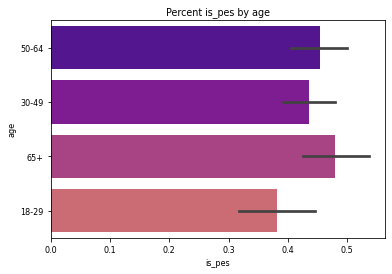

In [57]:
bar_graph_percent_pessimistic(train[train.age!='DK/REF'], "is_pes", "age")

#### Age and Education

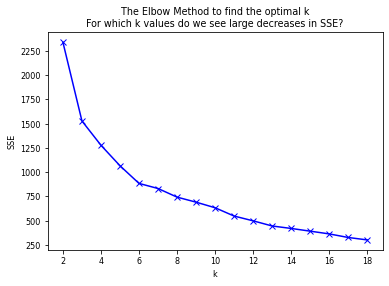

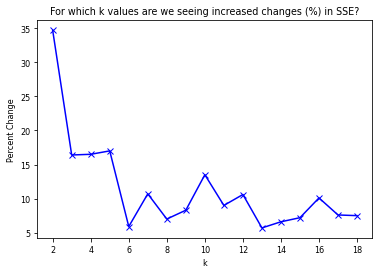

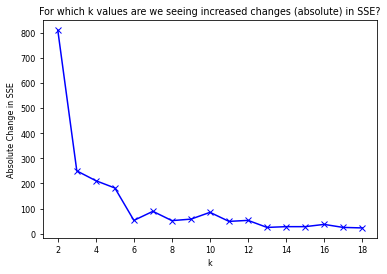

,k,sse,delta,pct_delta
0,2,2337.736166,810.0,34.7
1,3,1527.239472,250.0,16.4
2,4,1277.306075,211.0,16.5
3,5,1066.203301,182.0,17.0
4,6,884.516886,53.0,5.9
5,7,831.991634,89.0,10.7
6,8,743.331356,52.0,7.0
7,9,691.481507,58.0,8.3
8,10,633.911139,85.0,13.5
9,11,548.439228,49.0,9.0


In [58]:
e.find_k(train.replace(replace_key), ['age', 'happen_pub_ed', 'schools'], range(2,20))

In [59]:
# Fit K-Means (just on train, again!)
X = train[['age', 'happen_pub_ed', 'schools']].replace(replace_key)
kmeans = KMeans(n_clusters=6, random_state=123)
kmeans.fit(X)

train['age_edu_cluster'] = kmeans.predict(X)
df['age_edu_cluster'] = kmeans.predict(df[['age', 'happen_pub_ed', 'schools']].replace(replace_key))

Text(0.5, 1.0, 'Visualizing Cluster Centers')

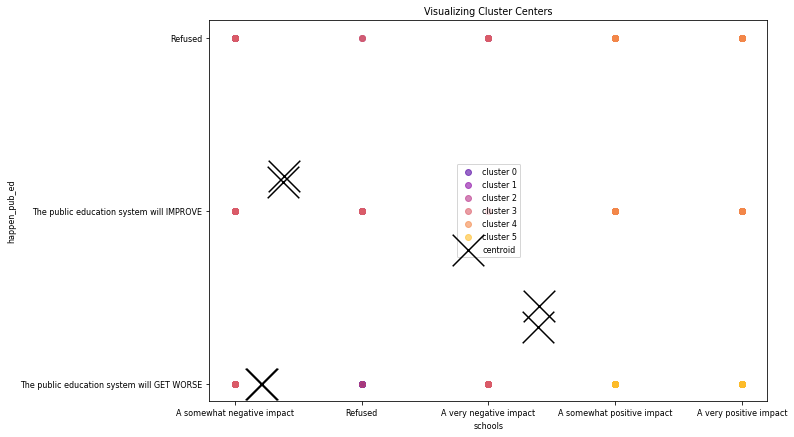

In [60]:
# create a df to allow us to visualize where the centroids are
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# visualize cluster with centroids
plt.figure(figsize=(10, 7))

for cluster, subset in train.groupby('age_edu_cluster'):
    plt.scatter(subset.schools, subset.happen_pub_ed, label='cluster ' + str(cluster), alpha=.6)
    
centroids.plot.scatter(y='happen_pub_ed', x='schools', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('schools')
plt.ylabel('happen_pub_ed')
plt.title('Visualizing Cluster Centers')

#### Age and Wealth

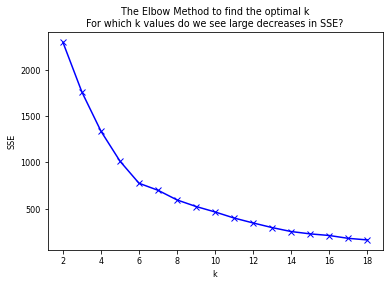

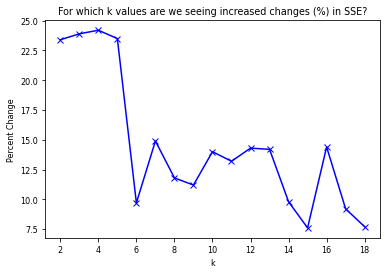

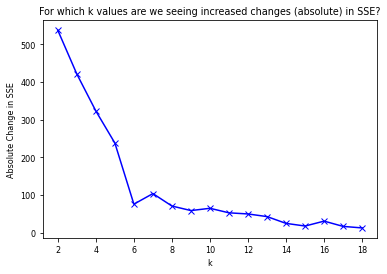

,k,sse,delta,pct_delta
0,2,2295.154532,537.0,23.4
1,3,1757.800676,421.0,23.9
2,4,1337.032952,323.0,24.2
3,5,1014.133073,238.0,23.5
4,6,776.200906,76.0,9.7
5,7,700.528935,104.0,14.9
6,8,596.415407,71.0,11.8
7,9,525.787014,59.0,11.2
8,10,466.964446,65.0,14.0
9,11,401.527048,53.0,13.2


In [61]:
e.find_k(train.replace(replace_key), ['age', 'happen_wealthgap', 'share_americans_in_upper_class'], range(2,20))

In [62]:
# Fit K-Means (just on train, again!)
X = train[['age', 'happen_wealthgap', 'share_americans_in_upper_class']].replace(replace_key)
kmeans = KMeans(n_clusters=7, random_state=123)
kmeans.fit(X)

train['age_wealth_cluster'] = kmeans.predict(X)
df['age_wealth_cluster'] = kmeans.predict(df[['age', 'happen_wealthgap', 'share_americans_in_upper_class']].replace(replace_key))

Text(0.5, 1.0, 'Visualizing Cluster Centers')

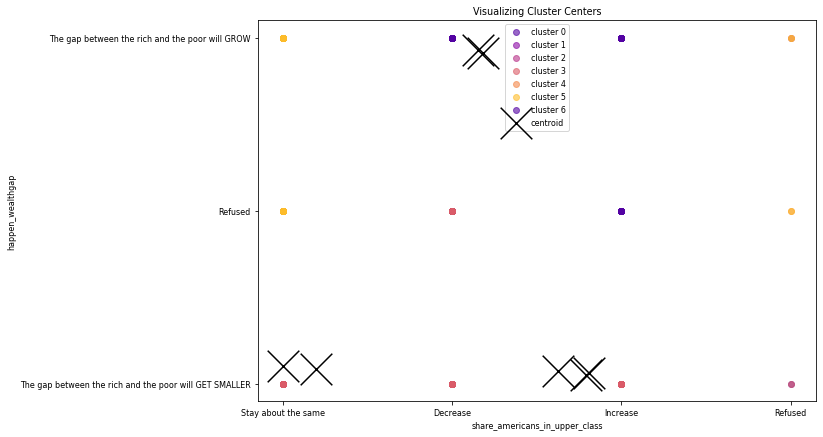

In [63]:
# create a df to allow us to visualize where the centroids are
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# visualize cluster with centroids
plt.figure(figsize=(10, 7))

for cluster, subset in train.groupby('age_wealth_cluster'):
    plt.scatter(subset.share_americans_in_upper_class, subset.happen_wealthgap, label='cluster ' + str(cluster), alpha=.6)
    
centroids.plot.scatter(y='happen_wealthgap', x='share_americans_in_upper_class', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('share_americans_in_upper_class')
plt.ylabel('happen_wealthgap')
plt.title('Visualizing Cluster Centers')

#### Age and country status

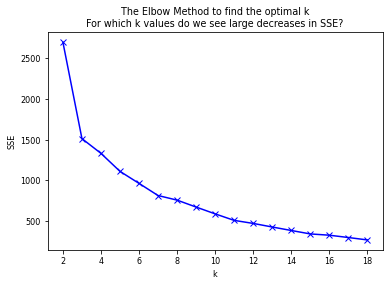

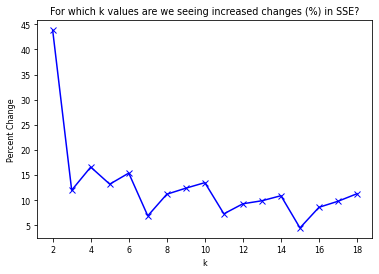

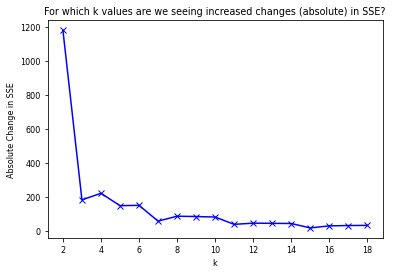

,k,sse,delta,pct_delta
0,2,2692.379870,1180.0,43.8
1,3,1512.183898,181.0,12.0
2,4,1331.390717,220.0,16.6
3,5,1111.038410,147.0,13.2
4,6,963.993451,149.0,15.4
5,7,815.257074,56.0,6.9
6,8,759.009713,85.0,11.2
7,9,674.097975,83.0,12.4
8,10,590.782573,80.0,13.5
9,11,510.821091,37.0,7.3


In [64]:
e.find_k(train.replace(replace_key), ['age', 'happen_usa', 'happen_china'], range(2,20))

In [65]:
# Fit K-Means (just on train, again!)
X = train[['age', 'happen_usa', 'happen_china']].replace(replace_key)
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)

train['age_status_cluster'] = kmeans.predict(X)
df['age_status_cluster'] = kmeans.predict(df[['age', 'happen_usa', 'happen_china']].replace(replace_key))

Text(0.5, 1.0, 'Visualizing Cluster Centers')

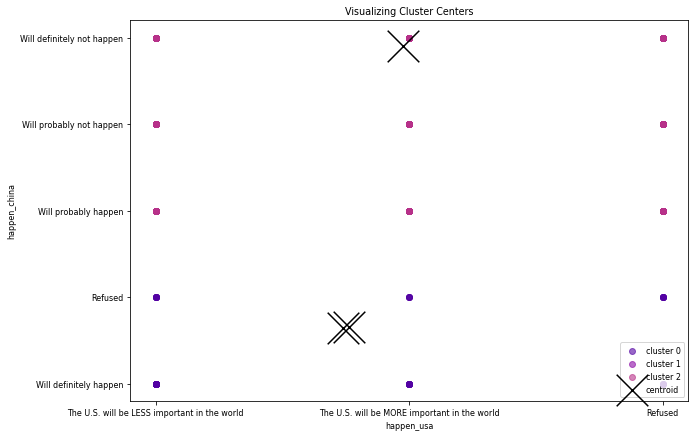

In [66]:
# create a df to allow us to visualize where the centroids are
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# visualize cluster with centroids
plt.figure(figsize=(10, 7))

for cluster, subset in train.groupby('age_status_cluster'):
    plt.scatter(subset.happen_usa, subset.happen_china, label='cluster ' + str(cluster), alpha=.6)
    
centroids.plot.scatter(y='happen_china', x='happen_usa', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('happen_usa')
plt.ylabel('happen_china')
plt.title('Visualizing Cluster Centers')

### Now we work with Region
- Below is a graph that shows the percentage of pessimistic people for each regional group

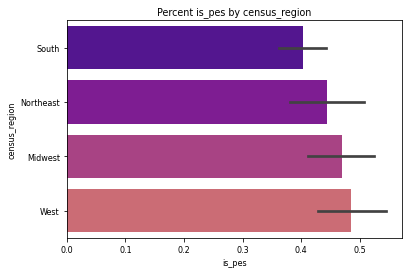

In [67]:
bar_graph_percent_pessimistic(train, "is_pes", "census_region")

#### Region and Climate

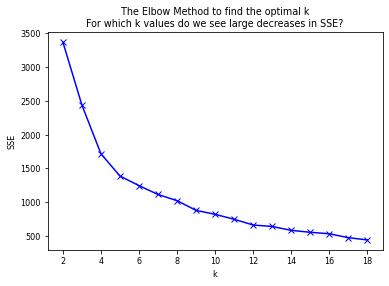

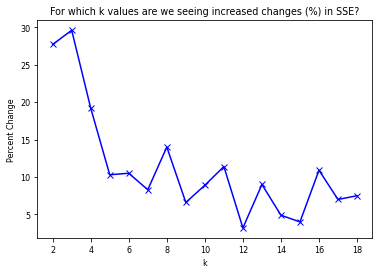

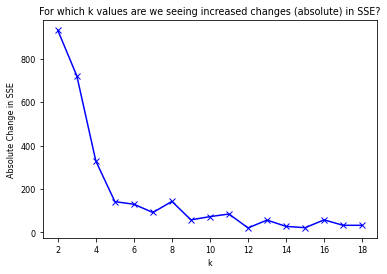

,k,sse,delta,pct_delta
0,2,3366.992609,931.0,27.7
1,3,2435.805476,721.0,29.6
2,4,1715.284688,329.0,19.2
3,5,1386.659538,142.0,10.3
4,6,1244.270571,130.0,10.5
5,7,1114.051017,92.0,8.3
6,8,1021.916730,143.0,14.0
7,9,878.601688,58.0,6.6
8,10,820.198774,73.0,8.9
9,11,746.973323,85.0,11.4


In [68]:
e.find_k(train.replace(replace_key), ['census_region', 'worry_climate', 'priority_climate'], range(2,20))

In [69]:
# Fit K-Means (just on train, again!)
X = train[['census_region', 'priority_climate', 'worry_climate']].replace(replace_key)
kmeans = KMeans(n_clusters=7, random_state=123)
kmeans.fit(X)

train['region_climate_cluster'] = kmeans.predict(X)

# We add these clusters to the original data frame to be used in the modeling section
df['region_climate_cluster'] = kmeans.predict(df[['census_region', 'priority_climate', 'worry_climate']].replace(replace_key))

Text(0.5, 1.0, 'Visualizing Cluster Centers')

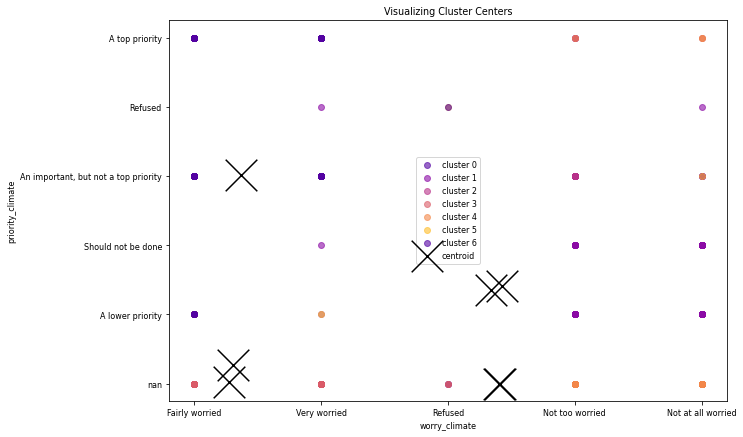

In [70]:
# create a df to allow us to visualize where the centroids are
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# visualize cluster with centroids
plt.figure(figsize=(10, 7))

for cluster, subset in train.groupby('region_climate_cluster'):
    plt.scatter(subset.worry_climate, subset.priority_climate, label='cluster ' + str(cluster), alpha=.6)
    
centroids.plot.scatter(y='priority_climate', x='worry_climate', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('worry_climate')
plt.ylabel('priority_climate')
plt.title('Visualizing Cluster Centers')

#### Region and Immigration

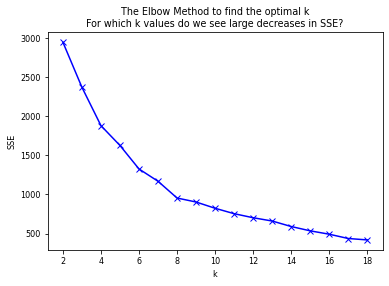

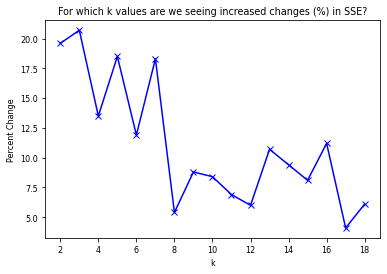

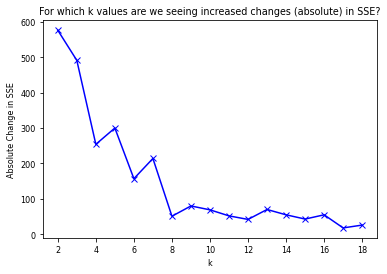

,k,sse,delta,pct_delta
0,2,2947.271891,576.0,19.6
1,3,2370.777864,491.0,20.7
2,4,1880.026269,254.0,13.5
3,5,1626.289206,300.0,18.5
4,6,1325.796146,157.0,11.9
5,7,1168.482118,214.0,18.3
6,8,954.271700,51.0,5.4
7,9,903.167110,80.0,8.8
8,10,823.247686,69.0,8.4
9,11,753.875017,52.0,6.9


In [71]:
e.find_k(train.replace(replace_key), ['census_region', 'legal_immigration_levels', 'priority_more_immigration'], range(2,20))

In [72]:
# Fit K-Means (just on train, again!)
X = train[['census_region', 'legal_immigration_levels', 'priority_more_immigration']].replace(replace_key)
kmeans = KMeans(n_clusters=8, random_state=123)
kmeans.fit(X)

train['region_imm_cluster'] = kmeans.predict(X)

# We add these clusters to the original data frame to be used in the modeling section
df['region_imm_cluster'] = kmeans.predict(df[['census_region', 'legal_immigration_levels', 'priority_more_immigration']].replace(replace_key))

Text(0.5, 1.0, 'Visualizing Cluster Centers')

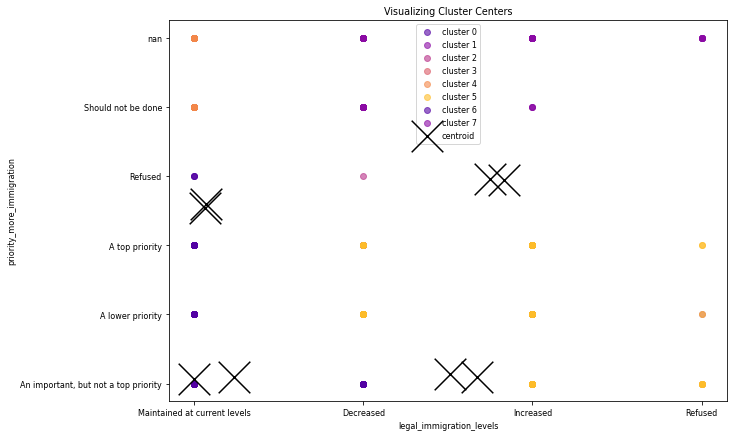

In [73]:
# create a df to allow us to visualize where the centroids are
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# visualize cluster with centroids
plt.figure(figsize=(10, 7))

for cluster, subset in train.groupby('region_imm_cluster'):
    plt.scatter(subset.legal_immigration_levels, subset.priority_more_immigration, label='cluster ' + str(cluster), alpha=.6)
    
centroids.plot.scatter(y='priority_more_immigration', x='legal_immigration_levels', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('legal_immigration_levels')
plt.ylabel('priority_more_immigration')
plt.title('Visualizing Cluster Centers')

#### Region and Religion

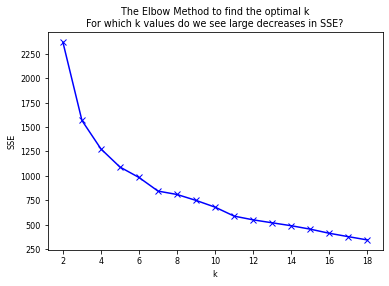

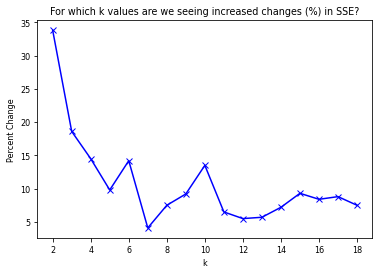

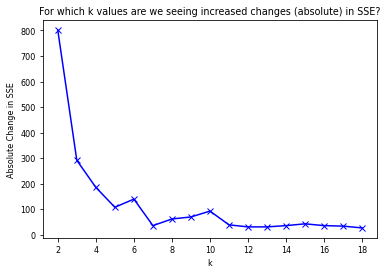

,k,sse,delta,pct_delta
0,2,2367.780499,801.0,33.8
1,3,1567.175121,291.0,18.6
2,4,1275.781325,185.0,14.5
3,5,1090.517714,107.0,9.8
4,6,983.921210,139.0,14.2
5,7,844.624470,35.0,4.1
6,8,809.945341,61.0,7.5
7,9,749.247418,69.0,9.2
8,10,680.263854,92.0,13.5
9,11,588.659991,38.0,6.5


In [74]:
e.find_k(train.replace(replace_key), ['census_region', 'rel_groups', 'happen_rel'], range(2,20))

In [75]:
# Fit K-Means (just on train, again!)
X = train[['census_region', 'rel_groups', 'happen_rel']].replace(replace_key)
kmeans = KMeans(n_clusters=7, random_state=123)
kmeans.fit(X)

train['region_religion_cluster'] = kmeans.predict(X)

# We add these clusters to the original data frame to be used in the modeling section
df['region_religion_cluster'] = kmeans.predict(df[['census_region', 'rel_groups', 'happen_rel']].replace(replace_key))

Text(0.5, 1.0, 'Visualizing Cluster Centers')

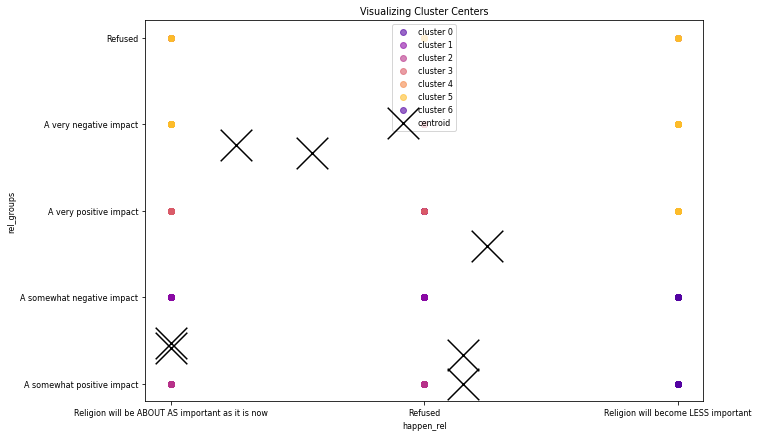

In [76]:
# create a df to allow us to visualize where the centroids are
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# visualize cluster with centroids
plt.figure(figsize=(10, 7))

for cluster, subset in train.groupby('region_religion_cluster'):
    plt.scatter(subset.happen_rel, subset.rel_groups, label='cluster ' + str(cluster), alpha=.6)
    
centroids.plot.scatter(y='rel_groups', x='happen_rel', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('happen_rel')
plt.ylabel('rel_groups')
plt.title('Visualizing Cluster Centers')

#### Now lets run the chi-square test on each of the subsets

In [77]:
# Generate object
obj = e.generate_and_return_obj(df[['age_edu_cluster', 'age_wealth_cluster', 'age_status_cluster', 'region_climate_cluster', 'region_imm_cluster', 'region_religion_cluster', 'is_pes']])
# Examine the chi2 results and return the statistical values
obj.chi2_df.sort_values(by='p_val')

,chi2,p_val,deg_free,expected_freq
age_edu_cluster,186.850553,1.840485e-38,5,"[[90.87713068181819, 72.12286931818181], [123...."
age_wealth_cluster,81.891588,1.452316e-15,6,"[[70.24857954545455, 55.75142045454545], [117...."
region_religion_cluster,72.579431,1.207917e-13,6,"[[123.2137784090909, 97.7862215909091], [98.68..."
age_status_cluster,25.545985,2.836350e-06,2,"[[98.125, 77.875], [308.31321022727275, 244.68..."
region_climate_cluster,24.090900,5.025279e-04,6,"[[148.86008522727272, 118.13991477272727], [11..."
region_imm_cluster,24.323184,9.994736e-04,7,"[[93.10724431818181, 73.89275568181819], [79.1..."


<a name='explore_takeaways'></a>
## Explore Takeaways

> - There a small differences in future outlook when considering sex, income and education.
> - When it comes to age and region, it seems like western individuals who are 65 years of age and older are the most pessimistic, while southern 18 to 29 year olds are the most optimisitc.
> - While small differences exist, they do not appear to be significant.
> - Through chi-squared testing, we verify that there is not a significant relationship between these features and our target.
> - Even though they are not necessarily drivers of overall future outlook, the findings are still helpful in isolation.
> - We used chi-squared stastical testing to find the issues significantly correlated with pessimism. 
     - The subgroups we analyzed were based on:
          - gender (men and women), 
          - political party (Republicans and Democrats), 
          - income level (less than 30,000 USD, between 30,000 and 75,000 USD, and more than 75,000 USD), and
          - education level (high school or less, some college, college graduates and above). 
     - Each subgroup had a series of issues uniquely significant to that subgroup.
    > - We created clusters for `age` and `census_region`. However, from the statistical tests, we found that none of the clusters could significantly predict pessimism.


<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='modeling'></a>
# Modeling & Evaluation
✓ _Plan_ ➜ ✓ _Acquire_ ➜ ✓ _Prepare_ ➜ ✓ _Explore_ ➜ 🟢 **Model** ➜ ☐ _Deliver_

> - We first have to choose a baseline to compare our models against.
> - The main models we will be using are Decision Tree, Random Forest, and K-Nearest Neighbor.
> - We will use different variations of our models until we determine one model to have outperformed our baseline and to have avoided overfitting or underfitting on the training data.
> - We will also be testing feature importance to see what drives an individual's overall attitude.
> - Once we choose our best model, we will run this model on our Out-of-sample dataset.

In [78]:
#Get dummy variables for Classification models
o = e.generate_and_return_obj(df)
o.X_train_dummies.head()

,qkey,weight,age_edu_cluster,age_wealth_cluster,age_status_cluster,region_climate_cluster,region_imm_cluster,region_religion_cluster,device_type_Mobile phone,device_type_Tablet,...,"registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed",registered_to_vote_nan,political_views_Liberal,political_views_Moderate,political_views_Refused,political_views_Very conservative,political_views_Very liberal,internet_access_Non Internet User,volunteer_Refused,volunteer_Yes
1859,201801113305,3.057078,3,6,1,0,4,2,1,0,...,0,0,0,0,0,0,0,0,0,1
96,191336,0.433484,4,6,1,6,6,2,0,0,...,1,0,1,0,0,0,0,0,0,0
420,668019,2.413983,5,5,0,6,6,2,0,0,...,0,1,1,0,0,0,0,0,0,0
1424,201801054651,0.362586,2,1,2,5,0,3,1,0,...,0,0,1,0,0,0,0,0,0,0
114,200943,0.303046,0,2,2,1,6,4,0,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
#We will turn off column truncation so that we can see the names of each model
pd.set_option('display.max_colwidth', None)

<a name='baseline'></a>
## Baseline
Let's set a baseline score to compare our models against.

In [80]:
# We use the mean value based off of our target variable
print(f'Baseline Accuracy: {(1.00 - round(o.y_train_dummies.mean(), 4))* 100}%')

Baseline Accuracy: 55.75%


We now have a baseline!

To evaluate our models, we will create a DataFrame to compare the performance of each model. 

In [81]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

,model_name,train_score,validate_score


In [82]:
models_list = []
models_name = []

<a name='decision_tree'></a>
## Decision Tree

In [83]:
# Thise function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
tree_list, tree_model_name_list = m.decision_tree_models(10)

In [84]:
models_list.append(tree_list)
models_name.append(tree_model_name_list)

In [85]:
# Run models based off specified parameters
# Append results to score_df
for model, name in zip(tree_list, tree_model_name_list):
    score_df = m.test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [86]:
score_df.sort_values(by = "validate_score", ascending = False)

,model_name,train_score,validate_score
2,decision_tree_depth_5,0.793324,0.736755
0,decision_tree_depth_3,0.750710,0.731788
1,decision_tree_depth_4,0.778409,0.728477
4,decision_tree_depth_7,0.887784,0.713576
3,decision_tree_depth_6,0.842330,0.706954
5,decision_tree_depth_8,0.926136,0.672185
6,decision_tree_depth_9,0.949574,0.647351


<a name='random_forest'></a>
## Random Forest

In [87]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [88]:
models_list.append(forest_list)
models_name.append(forest_name_list)

In [89]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [90]:
score_df.sort_values(by = 'validate_score', ascending = False).head(10)

,model_name,train_score,validate_score
68,including_all_features_random_forest_min_samples_leaf_9_depth_1,0.848722,0.799669
58,including_all_features_random_forest_min_samples_leaf_8_depth_1,0.844460,0.794702
55,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.794034,0.794702
20,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.821023,0.794702
66,including_all_features_random_forest_min_samples_leaf_8_depth_9,0.824574,0.791391
64,including_all_features_random_forest_min_samples_leaf_8_depth_7,0.786222,0.791391
57,including_all_features_random_forest_min_samples_leaf_8_depth_0,0.823153,0.791391
40,including_all_features_random_forest_min_samples_leaf_6_depth_3,0.855824,0.789735
32,including_all_features_random_forest_min_samples_leaf_5_depth_5,0.880682,0.789735
60,including_all_features_random_forest_min_samples_leaf_8_depth_3,0.856534,0.789735


<a name='knn'></a>
## K Nearest Neighbors

In [91]:
#This function takes in a neighbors amount 
# returns KNN parameters and corresponding names
k_neighbors_list, k_names_list = m.k_neighbors_models(10)

In [92]:
models_list.append(k_neighbors_list)
models_name.append(k_names_list)

In [93]:
#Append results to score_df
for model, name in zip(k_neighbors_list, k_names_list):
    score_df = m.test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [94]:
score_df.sort_values(by = "validate_score", ascending = False).head()

,model_name,train_score,validate_score
68,including_all_features_random_forest_min_samples_leaf_9_depth_1,0.848722,0.799669
58,including_all_features_random_forest_min_samples_leaf_8_depth_1,0.844460,0.794702
55,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.794034,0.794702
20,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.821023,0.794702
66,including_all_features_random_forest_min_samples_leaf_8_depth_9,0.824574,0.791391


<a name='other_models'></a>
## Other Models

In [95]:
# We will test the performance of a series of extra models, listed below
extra_models_list = [LinearSVC(), LogisticRegression(), MultinomialNB()]

extra_model_names = ['linear_svc', 'logistic_regression', 'naive_bayes']

In [96]:
models_list.append(extra_models_list)
models_name.append(extra_model_names)

In [97]:
#Append results to score_df
for model, name in zip(extra_models_list, extra_model_names):
    score_df = m.test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [98]:
score_df.sort_values(by = "validate_score", ascending = False).head(10)

,model_name,train_score,validate_score
68,including_all_features_random_forest_min_samples_leaf_9_depth_1,0.848722,0.799669
55,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.794034,0.794702
20,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.821023,0.794702
58,including_all_features_random_forest_min_samples_leaf_8_depth_1,0.844460,0.794702
66,including_all_features_random_forest_min_samples_leaf_8_depth_9,0.824574,0.791391
64,including_all_features_random_forest_min_samples_leaf_8_depth_7,0.786222,0.791391
57,including_all_features_random_forest_min_samples_leaf_8_depth_0,0.823153,0.791391
59,including_all_features_random_forest_min_samples_leaf_8_depth_2,0.849432,0.789735
32,including_all_features_random_forest_min_samples_leaf_5_depth_5,0.880682,0.789735
40,including_all_features_random_forest_min_samples_leaf_6_depth_3,0.855824,0.789735


## Find Best Model

In [99]:
#Make list of model names into Pandas Series
models_name_series = pd.Series(models_name)
models_name_series = models_name_series.apply(pd.Series).stack().reset_index(drop=True)

#Make list of models into Pandas Series
models_list_series = pd.Series(models_list)
models_list_series = models_list_series.apply(pd.Series).stack().reset_index(drop=True)

#Make a DataFrame of model names and models
models_df = pd.DataFrame({'model_name': models_name_series, 'model': models_list_series})

#Find best performing model from score_df
score_df = score_df.sort_values(by = "validate_score", ascending = False).reset_index(drop = True)

score_df.head()

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_9_depth_1,0.848722,0.799669
1,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.794034,0.794702
2,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.821023,0.794702
3,including_all_features_random_forest_min_samples_leaf_8_depth_1,0.844460,0.794702
4,including_all_features_random_forest_min_samples_leaf_8_depth_9,0.824574,0.791391


In [100]:
#Select best performing model
top_model = score_df.model_name[0]
#Get best perfoming model name 
best_model = models_df.model[models_df.model_name == top_model].item()

best_model

RandomForestClassifier(max_depth=8, min_samples_leaf=9)

<a name='feature_importance'></a>
## Feature Importance

We will use our best performing model so far to perform feature engineering. By only using the most important features in our model, we may be able to improve our accuracy.

In [101]:
#Make model
rf = best_model
#Fit Model
rf.fit(o.X_train_dummies, o.y_train_dummies)

RandomForestClassifier(max_depth=8, min_samples_leaf=9)

In [102]:
#Create data frame of feature importances, using our selected model
feature_importances = pd.DataFrame(rf.feature_importances_, index = o.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances.columns.names = ['category']

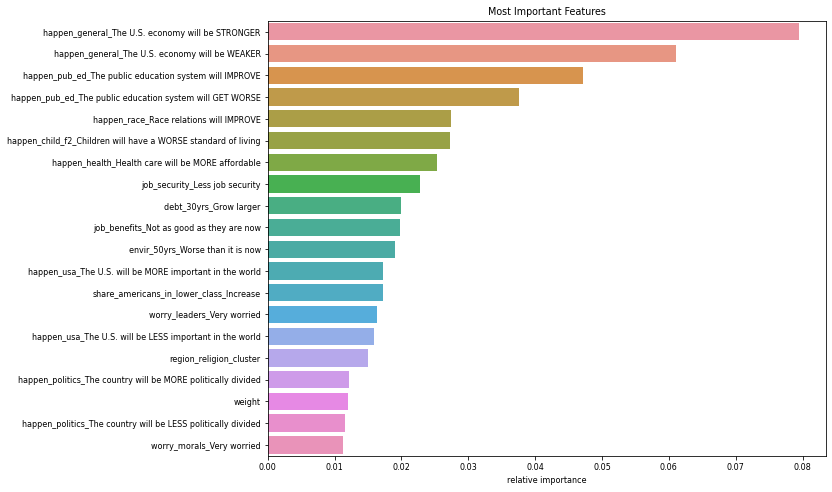

In [103]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:20], y=feature_importances.index[0:20]).set(title="Most Important Features")
# Save feature importance fig
plt.savefig('images/feature_importance.jpeg')

### Feature Importance Takeaways
- Public Education and U.S. economics are major drivers of pessimism.
- One's own job benefits, race relations, future standards of living, healthcare, and the country's world status follow closely behind in overall importance.

<a name='top'></a>
## Modeling with just the top features

### Modeling with just the top 30 features
We will attempt to create a more accurate model by using just the most important features in our dataset. Because Random Forest Classifier has proven itself to be the most accurate model on our data, we will continue to use Random Forest Classifier. 

In [104]:
#Select 30 most important features
top_thirty = feature_importances[0:30].index.to_list()

In [105]:
#Make new train, validate, and test datasets with just the thirty features
X_train_top_thirty = o.X_train_dummies[top_thirty]
X_validate_top_thirty = o.X_validate_dummies[top_thirty]
X_validate_top_thirty = o.X_validate_dummies[top_thirty]

In [106]:
#Get names of new Random Forest Models
forest_list_30, forest_name_list_30 = m.random_forest_models(10, 10, 'thirty')

In [107]:
models_name.append(forest_name_list_30)
models_list.append(forest_list_30)

In [108]:
#Append results to score_df
for model, name in zip(forest_list_30, forest_name_list_30):
    score_df = m.test_a_model(X_train_top_thirty, o.y_train_dummies, X_validate_top_thirty, o.y_validate_dummies, model, name, score_df)

In [109]:
score_df.sort_values(by= "validate_score", ascending = False).head()

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_9_depth_1,0.848722,0.799669
88,thirty_features_random_forest_min_samples_leaf_4_depth_0,0.757812,0.799669
133,thirty_features_random_forest_min_samples_leaf_8_depth_5,0.748580,0.796358
134,thirty_features_random_forest_min_samples_leaf_8_depth_6,0.763494,0.794702
2,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.821023,0.794702


### Modeling with just the top 40 features

In [110]:
#Select 40 most important features
top_forty = feature_importances[0:40].index.to_list()

In [111]:
#Make new train, validate, and test datasets with just forty features
X_train_top_forty = o.X_train_dummies[top_forty]
X_validate_top_forty = o.X_validate_dummies[top_forty]
X_validate_top_forty = o.X_validate_dummies[top_forty]

In [112]:
#Get the names of new Random Forest models
forest_list_40, forest_name_list_40 = m.random_forest_models(10, 10, 'forty')

In [113]:
models_name.append(forest_name_list_40)
models_list.append(forest_list_40)

In [114]:
#Append results to score_df
for model, name in zip(forest_list_40, forest_name_list_40):
    score_df = m.test_a_model(X_train_top_thirty, o.y_train_dummies, X_validate_top_thirty, o.y_validate_dummies, model, name, score_df)

In [115]:
score_df.sort_values(by= "validate_score", ascending = False).head(15)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_9_depth_1,0.848722,0.799669
88,thirty_features_random_forest_min_samples_leaf_4_depth_0,0.757812,0.799669
152,forty_features_random_forest_min_samples_leaf_4_depth_1,0.759233,0.798013
160,forty_features_random_forest_min_samples_leaf_4_depth_9,0.747159,0.796358
133,thirty_features_random_forest_min_samples_leaf_8_depth_5,0.748580,0.796358
81,thirty_features_random_forest_min_samples_leaf_3_depth_3,0.769886,0.794702
116,thirty_features_random_forest_min_samples_leaf_6_depth_8,0.757812,0.794702
89,thirty_features_random_forest_min_samples_leaf_4_depth_1,0.760653,0.794702
161,forty_features_random_forest_min_samples_leaf_5_depth_0,0.764915,0.794702
2,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.821023,0.794702


<a name='model_comparison'></a>
## Model Comparison

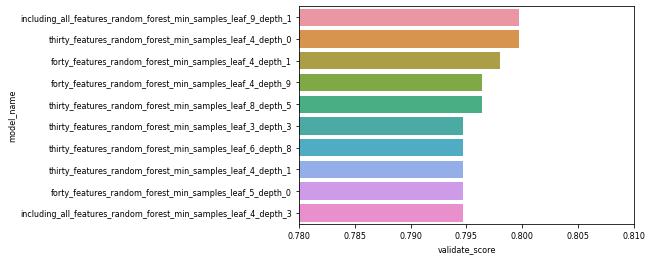

In [116]:
best_models = sns.barplot(y = "model_name",
                          x = 'validate_score',
                          data = score_df.sort_values(by = "validate_score", ascending = False).head(10),
                         ).set(xlim=(0.78, 0.81))

# This is to display the title, since it cannot be set on the obj
display(HTML('<center><h4>Model Comparison</h4></center>'))

# Save figure and model comparison
plt.savefig('images/model_comparison.jpeg')

plt.show()

In [117]:
#Make list of model names into Pandas Series
models_name_series = pd.Series(models_name)
models_name_series = models_name_series.apply(pd.Series).stack().reset_index(drop=True)

#Make list of models into Pandas Series
models_list_series = pd.Series(models_list)
models_list_series = models_list_series.apply(pd.Series).stack().reset_index(drop=True)

In [118]:
#Make a DataFrame of model names and models
models_df = pd.DataFrame({'model_name': models_name_series, 'model': models_list_series})

In [119]:
#Find best performing model from score_df
score_df = score_df.sort_values(by = "validate_score", ascending = False).reset_index(drop = True)

In [120]:
score_df.head(10)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_9_depth_1,0.848722,0.799669
1,thirty_features_random_forest_min_samples_leaf_4_depth_0,0.757812,0.799669
2,forty_features_random_forest_min_samples_leaf_4_depth_1,0.759233,0.798013
3,forty_features_random_forest_min_samples_leaf_4_depth_9,0.747159,0.796358
4,thirty_features_random_forest_min_samples_leaf_8_depth_5,0.748580,0.796358
5,thirty_features_random_forest_min_samples_leaf_3_depth_3,0.769886,0.794702
6,thirty_features_random_forest_min_samples_leaf_6_depth_8,0.757812,0.794702
7,thirty_features_random_forest_min_samples_leaf_4_depth_1,0.760653,0.794702
8,forty_features_random_forest_min_samples_leaf_5_depth_0,0.764915,0.794702
9,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.821023,0.794702


In [310]:
#Select best performing model
top_model = score_df.model_name[score_df.validate_score == score_df.validate_score.max()][0]#.item()

In [311]:
top_model

'including_all_features_random_forest_min_samples_leaf_6_depth_7'

In [312]:
#Get best perfoming model name 
best_model = models_df.model[models_df.model_name == top_model].item()
best_model_name = models_df.model_name[models_df.model_name == top_model].item()

In [313]:
best_model

RandomForestClassifier(max_depth=2, min_samples_leaf=7)

In [314]:
best_model_name

'including_all_features_random_forest_min_samples_leaf_6_depth_7'

### Model Comparison Takeaways
Our best performing model is printed above. The best performing model may change depending on the iteration.

<a name='out_of_sample'></a>
## Out of Sample Testing

In [315]:
# Create the model
rf= best_model

# Fit the model
rf.fit(o.X_train_dummies, o.y_train_dummies)

RandomForestClassifier(max_depth=2, min_samples_leaf=7)

In [316]:
# Create and store predictions from the test data
test_predictions = rf.predict(o.X_test_dummies)

In [317]:
# Compare actual is_pes values with our predicted is_pess values
classification_report_test = pd.DataFrame(classification_report(o.y_test_dummies, test_predictions, output_dict = True)).T
classification_report_test

,precision,recall,f1-score,support
0,0.717647,0.868327,0.785829,281.000000
1,0.773006,0.567568,0.654545,222.000000
accuracy,0.735586,0.735586,0.735586,0.735586
macro avg,0.745327,0.717947,0.720187,503.000000
weighted avg,0.742080,0.735586,0.727887,503.000000


<a name='gender_modeling'></a>
## Modeling the Gender Subsets

In [318]:
#Split the data into male and female subsets
males_df = df[df.sex == "Male"]
females_df = df[df.sex == "Female"]

### Modeling the Female Subset

In [ ]:
females = e.generate_and_return_obj(females_df)
females.X_train_dummies.head()

In [ ]:
print(f'Baseline Accuracy: {round((1 - females.y_train_dummies.mean())* 100, 2)}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(females.X_train_dummies, females.y_train_dummies, females.X_validate_dummies, females.y_validate_dummies, model, name, score_df)

In [ ]:
#Print out results of models
score_df = score_df.sort_values(by = "validate_score", ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

In [ ]:
best_model

#### Feature Importance for Females

In [ ]:
#Fit Model
best_model.fit(females.X_train_dummies, females.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_females = pd.DataFrame(best_model.feature_importances_, index = females.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_females = feature_importances_females.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_females.columns.names = ['category']

In [ ]:
relative_importances_females = sns.barplot(x=feature_importances_females['relative importance'][0:10], y=feature_importances_females.index[0:10])
plt.savefig('images/females.jpeg', bbox_inches='tight')

### Modeling the Male Subset

In [ ]:
males = e.generate_and_return_obj(males_df)
males.X_train_dummies.head()

In [ ]:
#Set Baseline Accuracy 
print(f'Baseline Accuracy: {round(1.00 - males.y_train_dummies.mean(), 4)* 100}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [ ]:
#Append results to score_df
#Loop through different models
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(males.X_train_dummies, males.y_train_dummies, males.X_validate_dummies, males.y_validate_dummies, model, name, score_df)

In [ ]:
#Print out best performing models
score_df = score_df.sort_values(by = "validate_score", ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

In [ ]:
best_model

#### Feature Importance for Males

In [ ]:
#Fit Model
best_model.fit(males.X_train_dummies, males.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_males = pd.DataFrame(best_model.feature_importances_, index = males.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_males = feature_importances_males.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_males.columns.names = ['category']

In [ ]:
relative_importances_males = sns.barplot(x=feature_importances_males['relative importance'][0:10], y=feature_importances_males.index[0:10])

plt.savefig('images/males.jpeg', bbox_inches='tight')

<a name='political_modeling'></a>
## Modeling the Political Party Subsets

In [ ]:
#Make subsets for Republicans and Democrats
republican_dataframe = df[df.summary_of_political_party_data == ' Rep/Lean Rep']
democrats_dataframe = df[df.summary_of_political_party_data == "Dem/Lean Dem"]

### Modeling the Republican Subset

In [ ]:
republicans = e.generate_and_return_obj(republican_dataframe)
republicans.X_train_dummies.head()

In [ ]:
print(f'Baseline Accuracy: {round(1.00 - republicans.y_train_dummies.mean(), 4)* 100}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(republicans.X_train_dummies, republicans.y_train_dummies, republicans.X_validate_dummies, republicans.y_validate_dummies, model, name, score_df)

In [ ]:
score_df = score_df.sort_values(by = "validate_score", ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

In [ ]:
best_model

#### Feature Engineering for Republicans

In [ ]:
#Fit Model
best_model.fit(republicans.X_train_dummies, republicans.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_republicans = pd.DataFrame(best_model.feature_importances_, index = republicans.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_republicans = feature_importances_republicans.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_republicans.columns.names = ['category']

In [ ]:
relative_importances_republicans = sns.barplot(x=feature_importances_republicans['relative importance'][0:10], y=feature_importances_republicans.index[0:10])

plt.savefig('images/republicans.jpeg', bbox_inches='tight')

### Modeling the Democrats Subset

In [ ]:
democrats = e.generate_and_return_obj(democrats_dataframe)
democrats.X_train_dummies.head()

In [ ]:
print(f'Baseline Accuracy: {round(1.00 - democrats.y_train_dummies.mean(), 4)* 100}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(democrats.X_train_dummies, democrats.y_train_dummies, democrats.X_validate_dummies, democrats.y_validate_dummies, model, name, score_df)

In [ ]:
score_df = score_df.sort_values(by = 'validate_score', ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

best_model

#### Feature Engineering for Democrats Subset

In [ ]:
#Fit Model
best_model.fit(democrats.X_train_dummies, democrats.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_democrats = pd.DataFrame(best_model.feature_importances_, index = democrats.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_democrats = feature_importances_democrats.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_democrats.columns.names = ['category']

In [ ]:
relative_importances_democrats = sns.barplot(x=feature_importances_democrats['relative importance'][0:10], y=feature_importances_democrats.index[0:10])
plt.savefig('images/democrats.jpeg', bbox_inches='tight')

<a name='income_modeling'></a>
## Modeling the Income Level Subsets

In [ ]:
#Split the data into income group
thirty_to_seventy_five = df[df.family_income_three_categories == '$30-$74,999']
less_than_thirty = df[df.family_income_three_categories == '<$30,000']
over_seventy_five = df[df.family_income_three_categories == '$75,000+']

### Modeling for Income less than 30,000 USD

In [ ]:
lower = e.generate_and_return_obj(less_than_thirty)
lower.X_train_dummies.head()

In [ ]:
print(f'Baseline Accuracy: {round((1.00 - lower.y_train_dummies.mean())* 100, 2)}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df= pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(lower.X_train_dummies, lower.y_train_dummies, lower.X_validate_dummies, lower.y_validate_dummies, model, name, score_df)

In [ ]:
score_df = score_df.sort_values(by = 'validate_score', ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

best_model

#### Feature Engineering for Income less than 30,000 USD

In [ ]:
#Fit Model
best_model.fit(lower.X_train_dummies, lower.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_lower = pd.DataFrame(best_model.feature_importances_, index = lower.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_lower = feature_importances_lower.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_lower.columns.names = ['category']

In [ ]:
relative_importances_lower = sns.barplot(x=feature_importances_lower['relative importance'][0:10], y=feature_importances_lower.index[0:10])
plt.savefig('images/lower_income_group.jpeg', bbox_inches='tight')

### Modeling for Income Level 30,000 - 75,000 USD

In [ ]:
middle = e.generate_and_return_obj(thirty_to_seventy_five)
middle.X_train_dummies.head()

In [ ]:
print(f'Baseline Accuracy: {round((1.00 - middle.y_train_dummies.mean())* 100, 2)}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(middle.X_train_dummies, middle.y_train_dummies, middle.X_validate_dummies, middle.y_validate_dummies, model, name, score_df)

In [ ]:
score_df = score_df.sort_values(by = 'validate_score', ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

best_model

#### Feature Engineering for Income  30,000 - 75,000 USD

In [ ]:
#Fit Model
best_model.fit(middle.X_train_dummies, middle.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_middle = pd.DataFrame(best_model.feature_importances_, index = middle.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_middle = feature_importances_middle.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_middle.columns.names = ['category']

In [ ]:
relative_importances_middle = sns.barplot(x=feature_importances_middle['relative importance'][0:10], y=feature_importances_middle.index[0:10])
plt.savefig('images/middle_income_group.jpeg', bbox_inches='tight')

### Modeling for Income Over 75,000 USD

In [ ]:
higher = e.generate_and_return_obj(over_seventy_five)
higher.X_train_dummies.head()

In [ ]:
print(f'Baseline Accuracy: {round((1.00 - higher.y_train_dummies.mean())* 100, 2)}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df= pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(higher.X_train_dummies, higher.y_train_dummies, higher.X_validate_dummies, higher.y_validate_dummies, model, name, score_df)

In [ ]:
score_df = score_df.sort_values(by = 'validate_score', ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

best_model

In [ ]:
#Fit Model
best_model.fit(higher.X_train_dummies, higher.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_higher = pd.DataFrame(best_model.feature_importances_, index = higher.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_higher = feature_importances_higher.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_higher.columns.names = ['category']

In [ ]:
relative_importances_higher = sns.barplot(x=feature_importances_higher['relative importance'][0:10], y=feature_importances_higher.index[0:10])
plt.savefig('images/upper_income_group.jpeg', bbox_inches='tight')

<a name='education_modeling'></a>
## Modeling the Education Level Subsets

In [ ]:
#Make subsets for education level 
high_school_df = df[df.highest_education_three_categories == 'H.S. graduate or less']
college_grad_df = df[df.highest_education_three_categories == 'College graduate+']
some_college_df = df[df.highest_education_three_categories == 'Some College']

### Modeling the Subset of People whose Highest Education Level is High School or Less

In [ ]:
high_school = e.generate_and_return_obj(high_school_df)
high_school.X_train_dummies.head()

In [ ]:
print(f'Baseline Accuracy: {round((1.00 - high_school.y_train_dummies.mean())* 100, 2)}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(high_school.X_train_dummies, high_school.y_train_dummies, high_school.X_validate_dummies, high_school.y_validate_dummies, model, name, score_df)

In [ ]:
score_df = score_df.sort_values(by = 'validate_score', ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

best_model

#### Feature Importance for People whose Highest Education Level is High School or Less

In [ ]:
#Fit Model
best_model.fit(high_school.X_train_dummies, high_school.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_high_school = pd.DataFrame(best_model.feature_importances_, index = high_school.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_high_school = feature_importances_high_school.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_high_school.columns.names = ['category']

In [ ]:
relative_importances_high_school = sns.barplot(x=feature_importances_high_school['relative importance'][0:10], y=feature_importances_high_school.index[0:10])
plt.savefig('images/education_high_school_or_less.jpeg', bbox_inches='tight')

### Modeling the Subset of People whose Highest Education Level is Some College

In [ ]:
some_college = e.generate_and_return_obj(some_college_df)
some_college.X_train_dummies.head()

In [ ]:
print(f'Baseline Accuracy: {round((1.00 - some_college.y_train_dummies.mean())* 100, 2)}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(some_college.X_train_dummies, some_college.y_train_dummies, some_college.X_validate_dummies, some_college.y_validate_dummies, model, name, score_df)

In [ ]:
score_df = score_df.sort_values(by = 'validate_score', ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

best_model

#### Feature Engineering for People whose Highest Education Level is Some College

In [ ]:
#Fit Model
best_model.fit(some_college.X_train_dummies, some_college.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_college = pd.DataFrame(best_model.feature_importances_, index = some_college.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_college = feature_importances_college.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_college.columns.names = ['category']

In [ ]:
relative_importances_college = sns.barplot(x=feature_importances_college['relative importance'][0:10], y=feature_importances_college.index[0:10])
plt.savefig('images/education_some_college.jpeg', bbox_inches='tight')

### Modeling the Subset of People whose Highest Education Level is a College Degree and Above

In [ ]:
college_grad = e.generate_and_return_obj(college_grad_df)
college_grad.X_train_dummies.head()

In [ ]:
print(f'Baseline Accuracy: {round((1.00 - college_grad.y_train_dummies.mean())* 100, 2)}%')

In [ ]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

In [ ]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(college_grad.X_train_dummies, college_grad.y_train_dummies, college_grad.X_validate_dummies, college_grad.y_validate_dummies, model, name, score_df)

In [ ]:
score_df = score_df.sort_values(by = 'validate_score', ascending = False).reset_index(drop = True)
score_df.head()

In [ ]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_names = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

best_model

#### Feature Engineering the Subset of People whose Highest Education Level is a College Degree and Above

In [ ]:
#Fit the model
best_model.fit(college_grad.X_train_dummies, college_grad.y_train_dummies)

In [ ]:
#Create data frame of feature importances, using our selected model
feature_importances_college_grad = pd.DataFrame(best_model.feature_importances_, index = college_grad.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_college_grad = feature_importances_college_grad.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_college_grad.columns.names = ['category']

In [ ]:
relative_importances_college_grad = sns.barplot(x=feature_importances_college_grad['relative importance'][0:10], y=feature_importances_college_grad.index[0:10])
plt.savefig('images/education_college_graduate.jpeg', bbox_inches='tight')

<a name='cluster_modeling'></a>
## Modeling with Clusters

In [242]:
def cluster_score(col):
    cluster={}
    for i in train[col].sort_values().unique():
        cluster[i] = train[train[col]==i]
    cluster_dict = {}
    for i in cluster.keys():
        clust = e.generate_and_return_obj(cluster[i])
        clust.X_train_dummies.head()
        # Create a dataframe to store and compare our models' performances
        score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])

        #Append results to score_df
        for model, name in zip(forest_list, forest_name_list):
            score_df = m.test_a_model(clust.X_train_dummies, clust.y_train_dummies, clust.X_validate_dummies, clust.y_validate_dummies, model, name, score_df)

        score_df = score_df.sort_values(by = 'validate_score', ascending = False).reset_index(drop = True)
        cluster_dict[i] = score_df
    return cluster_dict

### Age and Education

In [249]:
age_edu = cluster_score('age_edu_cluster')
age_edu.keys()

In [302]:
age_edu[0].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_5_depth_2,0.967033,0.794872
1,including_all_features_random_forest_min_samples_leaf_7_depth_4,0.868132,0.769231
2,including_all_features_random_forest_min_samples_leaf_6_depth_9,0.901099,0.769231


In [303]:
age_edu[1].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_4_depth_4,0.959350,0.740741
1,including_all_features_random_forest_min_samples_leaf_5_depth_3,0.894309,0.722222
2,including_all_features_random_forest_min_samples_leaf_3_depth_4,0.951220,0.722222


In [304]:
age_edu[2].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_3_depth_0,0.775862,0.773333
1,including_all_features_random_forest_min_samples_leaf_7_depth_7,0.775862,0.773333
2,including_all_features_random_forest_min_samples_leaf_6_depth_4,0.816092,0.773333


In [305]:
age_edu[3].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_3_depth_0,0.794872,0.852941
1,including_all_features_random_forest_min_samples_leaf_8_depth_0,0.858974,0.852941
2,including_all_features_random_forest_min_samples_leaf_5_depth_1,0.910256,0.852941


In [306]:
age_edu[4].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_3_depth_7,0.900662,0.787879
1,including_all_features_random_forest_min_samples_leaf_5_depth_3,0.841060,0.772727
2,including_all_features_random_forest_min_samples_leaf_7_depth_0,0.801325,0.772727


In [307]:
age_edu[5].head()

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_5_depth_6,0.891566,0.736111
1,including_all_features_random_forest_min_samples_leaf_3_depth_3,0.837349,0.736111
2,including_all_features_random_forest_min_samples_leaf_8_depth_2,0.831325,0.722222
3,including_all_features_random_forest_min_samples_leaf_3_depth_1,0.734940,0.722222
4,including_all_features_random_forest_min_samples_leaf_5_depth_0,0.801205,0.722222


#### Age and Wealth

In [256]:
age_wealth = cluster_score('age_wealth_cluster')
age_wealth.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [257]:
age_wealth[0].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_4_depth_2,0.857143,0.8
1,including_all_features_random_forest_min_samples_leaf_3_depth_7,0.928571,0.8
2,including_all_features_random_forest_min_samples_leaf_4_depth_7,0.871429,0.8


In [258]:
age_wealth[1].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_6_depth_3,0.940171,0.803922
1,including_all_features_random_forest_min_samples_leaf_6_depth_8,0.888889,0.803922
2,including_all_features_random_forest_min_samples_leaf_6_depth_2,0.948718,0.784314


In [259]:
age_wealth[2].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_5_depth_4,0.822785,0.742857
1,including_all_features_random_forest_min_samples_leaf_6_depth_0,0.835443,0.742857
2,including_all_features_random_forest_min_samples_leaf_8_depth_7,0.797468,0.742857


In [260]:
age_wealth[3].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_3_depth_8,0.954545,0.871795
1,including_all_features_random_forest_min_samples_leaf_4_depth_4,0.863636,0.871795
2,including_all_features_random_forest_min_samples_leaf_5_depth_6,0.818182,0.846154


In [261]:
age_wealth[4].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_5_depth_5,0.930380,0.826087
1,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.879747,0.811594
2,including_all_features_random_forest_min_samples_leaf_4_depth_0,0.854430,0.811594


In [262]:
age_wealth[5].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.855172,0.761905
1,including_all_features_random_forest_min_samples_leaf_7_depth_5,0.731034,0.761905
2,including_all_features_random_forest_min_samples_leaf_7_depth_6,0.834483,0.746032


In [263]:
age_wealth[6].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_3_depth_1,0.873016,0.703704
1,including_all_features_random_forest_min_samples_leaf_3_depth_2,0.896825,0.685185
2,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.888889,0.685185


#### Age and Country Status

In [265]:
age_status = cluster_score('age_status_cluster')
age_status.keys()

dict_keys([0, 1, 2])

In [266]:
age_status[0].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_3_depth_6,0.979592,0.761905
1,including_all_features_random_forest_min_samples_leaf_3_depth_2,0.887755,0.714286
2,including_all_features_random_forest_min_samples_leaf_5_depth_1,0.897959,0.714286


In [267]:
age_status[1].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_9_depth_0,0.825243,0.819549
1,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.902913,0.812030
2,including_all_features_random_forest_min_samples_leaf_6_depth_1,0.860841,0.804511


In [268]:
age_status[2].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_5_depth_2,0.876316,0.815951
1,including_all_features_random_forest_min_samples_leaf_3_depth_5,0.942105,0.809816
2,including_all_features_random_forest_min_samples_leaf_5_depth_4,0.915789,0.803681


#### Region and Climate

In [272]:
region_climate = cluster_score('region_climate_cluster')
region_climate.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [274]:
region_climate[0].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_5_depth_8,0.825503,0.796875
1,including_all_features_random_forest_min_samples_leaf_3_depth_8,0.966443,0.796875
2,including_all_features_random_forest_min_samples_leaf_8_depth_7,0.872483,0.796875


In [275]:
region_climate[1].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.858407,0.897959
1,including_all_features_random_forest_min_samples_leaf_6_depth_2,0.929204,0.897959
2,including_all_features_random_forest_min_samples_leaf_3_depth_7,0.964602,0.897959


In [276]:
region_climate[2].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_3_depth_8,0.983333,0.851852
1,including_all_features_random_forest_min_samples_leaf_3_depth_5,0.983333,0.814815
2,including_all_features_random_forest_min_samples_leaf_3_depth_7,0.983333,0.814815


In [277]:
region_climate[3].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_3_depth_8,0.983051,0.725490
1,including_all_features_random_forest_min_samples_leaf_4_depth_0,0.864407,0.725490
2,including_all_features_random_forest_min_samples_leaf_7_depth_6,0.813559,0.705882


In [278]:
region_climate[4].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_6_depth_8,0.842857,0.709677
1,including_all_features_random_forest_min_samples_leaf_9_depth_1,0.871429,0.709677
2,including_all_features_random_forest_min_samples_leaf_5_depth_2,0.914286,0.677419


In [279]:
region_climate[5].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.944882,0.854545
1,including_all_features_random_forest_min_samples_leaf_3_depth_7,0.960630,0.836364
2,including_all_features_random_forest_min_samples_leaf_5_depth_4,0.937008,0.836364


In [281]:
region_climate[6].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_3_depth_1,0.856164,0.777778
1,including_all_features_random_forest_min_samples_leaf_7_depth_3,0.910959,0.777778
2,including_all_features_random_forest_min_samples_leaf_4_depth_2,0.904110,0.777778


#### Region and Immigration

In [285]:
region_imm = cluster_score('region_imm_cluster')
region_imm.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [289]:
region_imm[0].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_6_depth_1,0.913978,0.825
1,including_all_features_random_forest_min_samples_leaf_6_depth_3,0.935484,0.825
2,including_all_features_random_forest_min_samples_leaf_6_depth_4,0.903226,0.825


In [286]:
region_imm[1].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_6_depth_0,0.898734,0.735294
1,including_all_features_random_forest_min_samples_leaf_3_depth_3,0.962025,0.735294
2,including_all_features_random_forest_min_samples_leaf_6_depth_2,0.898734,0.735294


In [287]:
region_imm[2].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_8_depth_5,0.849315,0.875
1,including_all_features_random_forest_min_samples_leaf_6_depth_9,0.876712,0.875
2,including_all_features_random_forest_min_samples_leaf_8_depth_0,0.863014,0.875


In [288]:
region_imm[3].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_5_depth_9,0.887850,0.765957
1,including_all_features_random_forest_min_samples_leaf_3_depth_5,1.000000,0.765957
2,including_all_features_random_forest_min_samples_leaf_6_depth_2,0.906542,0.744681


In [290]:
region_imm[4].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_5_depth_3,0.924370,0.823529
1,including_all_features_random_forest_min_samples_leaf_8_depth_2,0.831933,0.823529
2,including_all_features_random_forest_min_samples_leaf_3_depth_8,0.957983,0.823529


In [291]:
region_imm[5].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_7_depth_4,0.916667,0.83871
1,including_all_features_random_forest_min_samples_leaf_7_depth_9,0.916667,0.83871
2,including_all_features_random_forest_min_samples_leaf_6_depth_4,0.916667,0.83871


In [292]:
region_imm[6].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_6_depth_1,0.879310,0.764706
1,including_all_features_random_forest_min_samples_leaf_3_depth_4,0.948276,0.764706
2,including_all_features_random_forest_min_samples_leaf_7_depth_0,0.818966,0.764706


In [293]:
region_imm[7].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_7_depth_7,0.870968,0.796296
1,including_all_features_random_forest_min_samples_leaf_3_depth_2,0.903226,0.796296
2,including_all_features_random_forest_min_samples_leaf_7_depth_0,0.911290,0.796296


#### Region and Religion

In [294]:
region_religion = cluster_score('region_religion_cluster')
region_religion.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [295]:
region_religion[0].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_4_depth_5,0.943089,0.811321
1,including_all_features_random_forest_min_samples_leaf_8_depth_9,0.845528,0.811321
2,including_all_features_random_forest_min_samples_leaf_6_depth_0,0.886179,0.811321


In [296]:
region_religion[1].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_5_depth_1,0.887755,0.813953
1,including_all_features_random_forest_min_samples_leaf_3_depth_8,0.969388,0.790698
2,including_all_features_random_forest_min_samples_leaf_4_depth_6,0.928571,0.767442


In [297]:
region_religion[2].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_7_depth_4,0.803571,0.816327
1,including_all_features_random_forest_min_samples_leaf_4_depth_7,0.919643,0.795918
2,including_all_features_random_forest_min_samples_leaf_3_depth_4,0.928571,0.795918


In [298]:
region_religion[3].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_6_depth_6,0.804348,0.800
1,including_all_features_random_forest_min_samples_leaf_6_depth_3,0.934783,0.800
2,including_all_features_random_forest_min_samples_leaf_9_depth_0,0.913043,0.775


In [299]:
region_religion[4].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_6_depth_1,0.892617,0.75
1,including_all_features_random_forest_min_samples_leaf_5_depth_2,0.906040,0.75
2,including_all_features_random_forest_min_samples_leaf_5_depth_3,0.899329,0.75


In [300]:
region_religion[5].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_7_depth_0,0.831169,0.794118
1,including_all_features_random_forest_min_samples_leaf_3_depth_6,0.974026,0.764706
2,including_all_features_random_forest_min_samples_leaf_5_depth_4,0.961039,0.764706


In [301]:
region_religion[6].head(3)

,model_name,train_score,validate_score
0,including_all_features_random_forest_min_samples_leaf_6_depth_1,0.878788,0.719298
1,including_all_features_random_forest_min_samples_leaf_8_depth_6,0.856061,0.719298
2,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.840909,0.719298


In [131]:
#Select best performing model
top_model = score_df.model_name[0]

#Convert forest names to series
forest_name_list = pd.Series(forest_name_list)

#Convert forest list to series
forest_model_list = pd.Series(forest_list)

#Convert forest names and models to DataFrame
forest_models_df = pd.DataFrame({'name': forest_name_list, 'model': forest_model_list})

#Get best performing model
best_model = forest_models_df.model[forest_models_df.name == top_model].item()

best_model

RandomForestClassifier(max_depth=8, min_samples_leaf=8)

In [132]:
#Fit the model
best_model.fit(edu_1.X_train_dummies, edu_1.y_train_dummies)

#Create data frame of feature importances, using our selected model
feature_importances_edu1 = pd.DataFrame(best_model.feature_importances_, index = edu_1.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_edu1 = feature_importances_edu1.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_edu1.columns.names = ['category']

relative_importances_edu1 = sns.barplot(x=feature_importances_edu1['relative importance'][0:10], y=feature_importances_edu1.index[0:10])


<a name='modeling_takeaways'></a>
## Modeling Takeaways

> - Big drivers of pessimism are public education and economics.
> - Some other major drivers are job benefits, job security, race relations, standards of living, healthcare, and the country's world status.
> - We chose the most common result of the target column as our baseline with an accuracy of 55.75%.
> - We ran over 200 variations of Decision Tree, Random Forest, K-Nearest Neighbor, and other models.
> - Overall, the model with the best performance was the Random Forest with:
    - `max_depth` = 8
    - `min_samples_leaf` = 8
> - This model performed with an accuracy of:
    - `train` (In-sample) = 92.05%
    - `validate` (Out-of-sample) = 80.46%
    - `test` (Out-of-sample) = 76.54%
> - We ran Classification models on subsets of the data. The subgsets we used were based on: 
    - gender (men and women), 
    - political party (Republicans and Democrats), 
    - income level (less than 30,000 USD, between 30,000 and 75,000 USD, and more than 75,000 USD), and 
    - highest education level (high school or less, some college, and college graduate). 
> - The accuracy of the models did not change significantly based on each subgroups. 
> - The best-performing Classification model for each subgroup indicated the features most predictive of pessismism for each subgroup. 


<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='delivery'></a>
# Project Delivery
✓ _Plan_ ➜ ✓ _Acquire_ ➜ ✓ _Prepare_ ➜ ✓ _Explore_ ➜ ✓ _Model_ ➜ 🟢 **Deliver**

> - Currently we are achieving an Out-of-sample accuracy of ~76% on our `test` data and we believe with further feature engineering and hyper-parameter optimization, we could achieve a higher accuracy. 

<a name='conclusion_and_next_steps'></a>

## Conclusion and Next Steps
> - While it appeared that there may have been a significant difference between the genders and their pessimisim, such a difference was not observed in this instance. 
> Additionally, we did not observe a significant difference in pessimism relative to income level.
> - The next step is to continue finalizing our work and to ensure this work is throughly documented.
> - With more time we will continue examining multiple different feature combinations and will test for significance from these observations.

<a name='replication'></a>
## Project Replication

> - Statistical data can be downloaded from <a href="https://www.kaggle.com/shankanater/american-trends-panel-pewresearch/download">here</a>.
> - You can read the SPSS Statistic data file with `pandas.read_spss("ATP W41.sav")`

<a name='data_use'></a>
## Data Use Agreements

> - The source of the data with express reference to the center in accordance with the following citation: “Pew Research Center’s American Trends Panel”
> - Any hypothesis, insight and or result within this project in no way implies or suggests as attributing a particular policy or lobbying objective or opinion to the Center, or as a Center endorsement of a cause, candidate, issue, party, product, business, organization, religion or viewpoint.
> - “The opinions expressed herein, including any implications for policy, are those of the author and not of Pew Research Center.”
> - Information on The American Trends Panel (ATP) can be found at <a href="https://www.pewresearch.org/our-methods/u-s-surveys/the-american-trends-panel/">The American Trends Panel</a>
> - More information on these user agreements can be found at <a href="https://www.pewresearch.org/about/terms-and-conditions/">Pew Research</a>.
>
> **Citation**
>
> "American Trends Panel Wave 41.” Pew Research Center, Washington, D.C. (December 27, 2018)  <a href="https://www.pewresearch.org/social-trends/dataset/american-trends-panel-wave-41/"> URL</a>.


<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

In [ ]:
%%html
<style>
table {margin-left: 0 !important;}
</style>